In [14]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
#import nltk

import nltk
import seaborn as sns
%matplotlib inline
import random

# Find pattern and create Transition Matrix for 0-20% quantile Using N-gram

In [20]:
data_0_20=pd.read_csv("data_0_20_quantile.csv")

In [21]:
data_0_20=data_0_20.merge(data_0_20.groupby(['user_id','session'])\
                                  .agg({'session':'size'})\
                                     .rename(columns={'session':'session_length'})\
                                       .reset_index(),on=['user_id','session'])

In [22]:
data_0_20

Unnamed: 0  user_id                             package_name  \
0             110422        8  com.google.android.googlequicksearchbox   
1             110423        8                       com.android.chrome   
2             110424        8  com.google.android.googlequicksearchbox   
3             110425        8                 com.netmarble.sknightsgb   
4             110426        8                    com.instagram.android   
...              ...      ...                                      ...   
75371359   228593003     9991           com.sonyericsson.conversations   
75371360   228593004     9991           com.sonyericsson.conversations   
75371361   228593005     9991                        com.facebook.orca   
75371362   228593006     9991           com.sonyericsson.conversations   
75371363   228593007     9991           com.sonyericsson.conversations   

          start_time  end_time  time_spend  app_code  sequence_number  \
0                  0        60          60     23949                2   
1                 60       360         300      7649                3   
2                360       370          10     23949                4   
3                370       701         331     36189                5   
4                701       711          10     27441                6   
...              ...       ...         ...       ...              ...   
75371359    44831760  44831764           4     45264            44462   
75371360    44832390  44832400          10     45264            44463   
75371361    44832400  44832490          90     19973            44464   
75371362    44832948  44833238         290     45264            44465   
75371363    44833541  44833591          50     45264            44466   

          sequence_Start_time  sequence_end_time  sleep_time_x  new_session  \
0                          40                 60             0        False   
1                          60                360             0        False   
2                         360                370             0        False   
3                         370                701             0        False   
4                         701                711             0        False   
...                       ...                ...           ...          ...   
75371359             44831760           44831764           731         True   
75371360             44832390           44832400           626         True   
75371361             44832400           44832490             0        False   
75371362             44832948           44833238           458         True   
75371363             44833541           44833591           303         True   

          session  session_length_x  sleep_time_y  session_length_y  
0               0                 6          95.0                 6  
1               0                 6          95.0                 6  
2               0                 6          95.0                 6  
3               0                 6          95.0                 6  
4               0                 6          95.0                 6  
...           ...               ...           ...               ...  
75371359     9802                 1         229.0                 1  
75371360     9803                 2         229.0                 2  
75371361     9803                 2         229.0                 2  
75371362     9804                 1         229.0                 1  
75371363     9805                 1         229.0                 1  

[75371364 rows x 16 columns]

In [6]:
user_corpus_0_20=data_0_20.groupby(['user_id','session']).package_name.apply(' '.join)

# 1-gram

In [20]:
print("Number of sessions:",user_corpus_0_20.shape[0])
print("0.75% of sessions:",user_corpus_0_20.shape[0]/100*0.75)

Number of sessions: 18467691
0.75% of sessions: 138507.6825


In [29]:
print("Number of sessions:",user_corpus_0_20.shape[0])
print("1% of sessions:",user_corpus_0_20.shape[0]/100*1)

Number of sessions: 18467691
1% of sessions: 184676.91


In [7]:
print("Number of sessions:",user_corpus_0_20.shape[0])
print("0.5% of sessions:",user_corpus_0_20.shape[0]/100*0.5)

Number of sessions: 18467691
0.5% of sessions: 92338.455


In [8]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization=vectorizer.fit_transform(user_corpus_0_20.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]

array(['bbc.mobile.news.uk', 'com.amazon.mShop.android.shopping',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.sportnews', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.google.android.apps.docs',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.music', 'com.google.android.youtube',
       'com.grindrapp.android', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.pinterest', 'com.pof.android', 'com.snapchat.android',
       'com.sony.nfx.app.sfrc', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.

In [9]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]))

Number of frequent patterns: 44


0.75% num 33
1% Number of frequent patterns: 30
10% Number of frequent patterns: 8
0.5% Number of frequent patterns: 44

# 2-gram

In [42]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_0_20.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.gm',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.google.android.youtube',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.snapchat.android',
       'com.facebook.kata

In [43]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]))

Number of frequent patterns: 79


1% Number of frequent patterns: 37
0.5% Number of frequent patterns: 79

# 3-gram

In [44]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_0_20.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]

array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.instagram.android com.facebook.katana',
       'com.facebook.katana com.snapchat.android com.facebook.katana',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.facebook.orca com.facebook.katana com.facebook.orca',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.snapchat.android com.facebook.katana com.snapchat.android',
       'com.whatsapp com.android.chrome com.whatsapp',
       'com.whatsapp com.facebook.katana com.whatsapp',
       'com.whatsapp com.instagram.android com.whatsapp',
       'com.whatsapp com.snapchat.android com.whatsapp'], dtype=

In [45]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]))

Number of frequent patterns: 14


1% Number of frequent patterns: 14

# 4-gram

In [46]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_0_20.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]

array(['com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana'],
      dtype=object)

In [47]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=92338)[1]]))

Number of frequent patterns: 1


# Transition Matrix for 0%-20% quantile group 

On the other hand, we need add paddings to be able to recognise if an app occur in the begining of a use sequence, patting is added.

In [13]:
# frequent apps for 0.5%
frequent_apps=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>92338)[1]]
frequent_apps

array(['bbc.mobile.news.uk', 'com.amazon.mShop.android.shopping',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.sportnews', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.google.android.apps.docs',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.music', 'com.google.android.youtube',
       'com.grindrapp.android', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.pinterest', 'com.pof.android', 'com.snapchat.android',
       'com.sony.nfx.app.sfrc', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.

In [14]:
print("Number of frequent apps:",len(frequent_apps))

Number of frequent apps: 44


In [17]:
fig = px.bar(x=frequent_apps, y = [(vectorization>0).sum(axis=0)[0,np.where(vectorizer.get_feature_names_out()==app)[0][0]] for app in frequent_apps],width=900,height=600)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Number of sessions with app")
fig.update_xaxes(type='category',tickangle = 45)

In [23]:
data_0_20=data_0_20.groupby(['user_id','session'])['package_name']\
         .apply(lambda x: pd.Series(['start'] + x.tolist() + ['end']))\
         .reset_index().drop('level_2', 1)

<ipython-input-23-9f01831d170b>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [24]:
data_0_20 = data_0_20.loc[:,['user_id','session','package_name']]

In [25]:
df_frequent_app_count = data_0_20[data_0_20.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [26]:
data_0_20['next_app'] = data_0_20.groupby(['user_id','session']).package_name.shift(-1)

In [27]:
df_next_app_count=data_0_20[data_0_20.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [28]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [29]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [30]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [31]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [32]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [33]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [35]:
Transaction_matrix.to_csv("Transaction_matrix_0_20_quantile_grouped.csv",index='False')

In [20]:
Transaction_matrix=pd.read_csv("Transaction_matrix_0_20_quantile_grouped.csv", index_col=0)

In [21]:
Transaction_matrix=Transaction_matrix.fillna(0)

In [22]:
Transaction_matrix

bbc.mobile.news.uk  \
package_name                                                     
bbc.mobile.news.uk                                    0.000000   
com.amazon.mShop.android.shopping                     0.429720   
com.android.chrome                                    0.463484   
com.android.email                                     0.559562   
com.android.incallui                                  0.108060   
com.android.phone                                     0.212962   
com.barclays.android.barclaysmobilebanking            0.352981   
com.bskyb.sportnews                                   0.821245   
com.ebay.mobile                                       0.528126   
com.facebook.katana                                   0.414933   
com.facebook.orca                                     0.210625   
com.google.android.apps.docs                          0.182985   
com.google.android.apps.maps                          0.317795   
com.google.android.apps.messaging                     0.376296   
com.google.android.apps.photos                        0.259244   
com.google.android.calendar                           0.286785   
com.google.android.gm                                 0.459402   
com.google.android.gms                                0.200644   
com.google.android.googlequicksearchbox               0.384777   
com.google.android.music                              0.163874   
com.google.android.youtube                            0.315161   
com.grindrapp.android                                 0.472892   
com.instagram.android                                 0.284486   
com.microsoft.office.outlook                          0.749685   
com.nianticlabs.pokemongo                             0.244047   
com.pinterest                                         0.294572   
com.pof.android                                       0.166779   
com.snapchat.android                                  0.257981   
com.sony.nfx.app.sfrc                                 0.507600   
com.sonyericsson.album                                0.222832   
com.sonyericsson.android.socialphonebook              0.094477   
com.sonyericsson.conversations                        0.197455   
com.sonyericsson.music                                0.641817   
com.sonymobile.calendar                               0.333078   
com.sonymobile.email                                  0.588176   
com.spotify.music                                     0.190805   
com.tinder                                            0.395125   
com.tumblr                                            0.164260   
com.twitter.android                                   0.554660   
com.viber.voip                                        0.340543   
com.whatsapp                                          0.305763   
com.yahoo.mobile.client.android.mail                  0.527463   
kik.android                                           0.109579   
uk.co.bbc.android.sportdomestic                       2.869574   

                                            com.amazon.mShop.android.shopping  \
package_name                                                                    
bbc.mobile.news.uk                                                   0.331910   
com.amazon.mShop.android.shopping                                    0.000000   
com.android.chrome                                                   0.539638   
com.android.email                                                    0.143366   
com.android.incallui                                                 0.072040   
com.android.phone                                                    0.167617   
com.barclays.android.barclaysmobilebanking                           0.704273   
com.bskyb.sportnews                                                  0.197353   
com.ebay.mobile                                                      1.507600   
com.facebook.katana                                                  0.255078   
com.facebook.orca                  

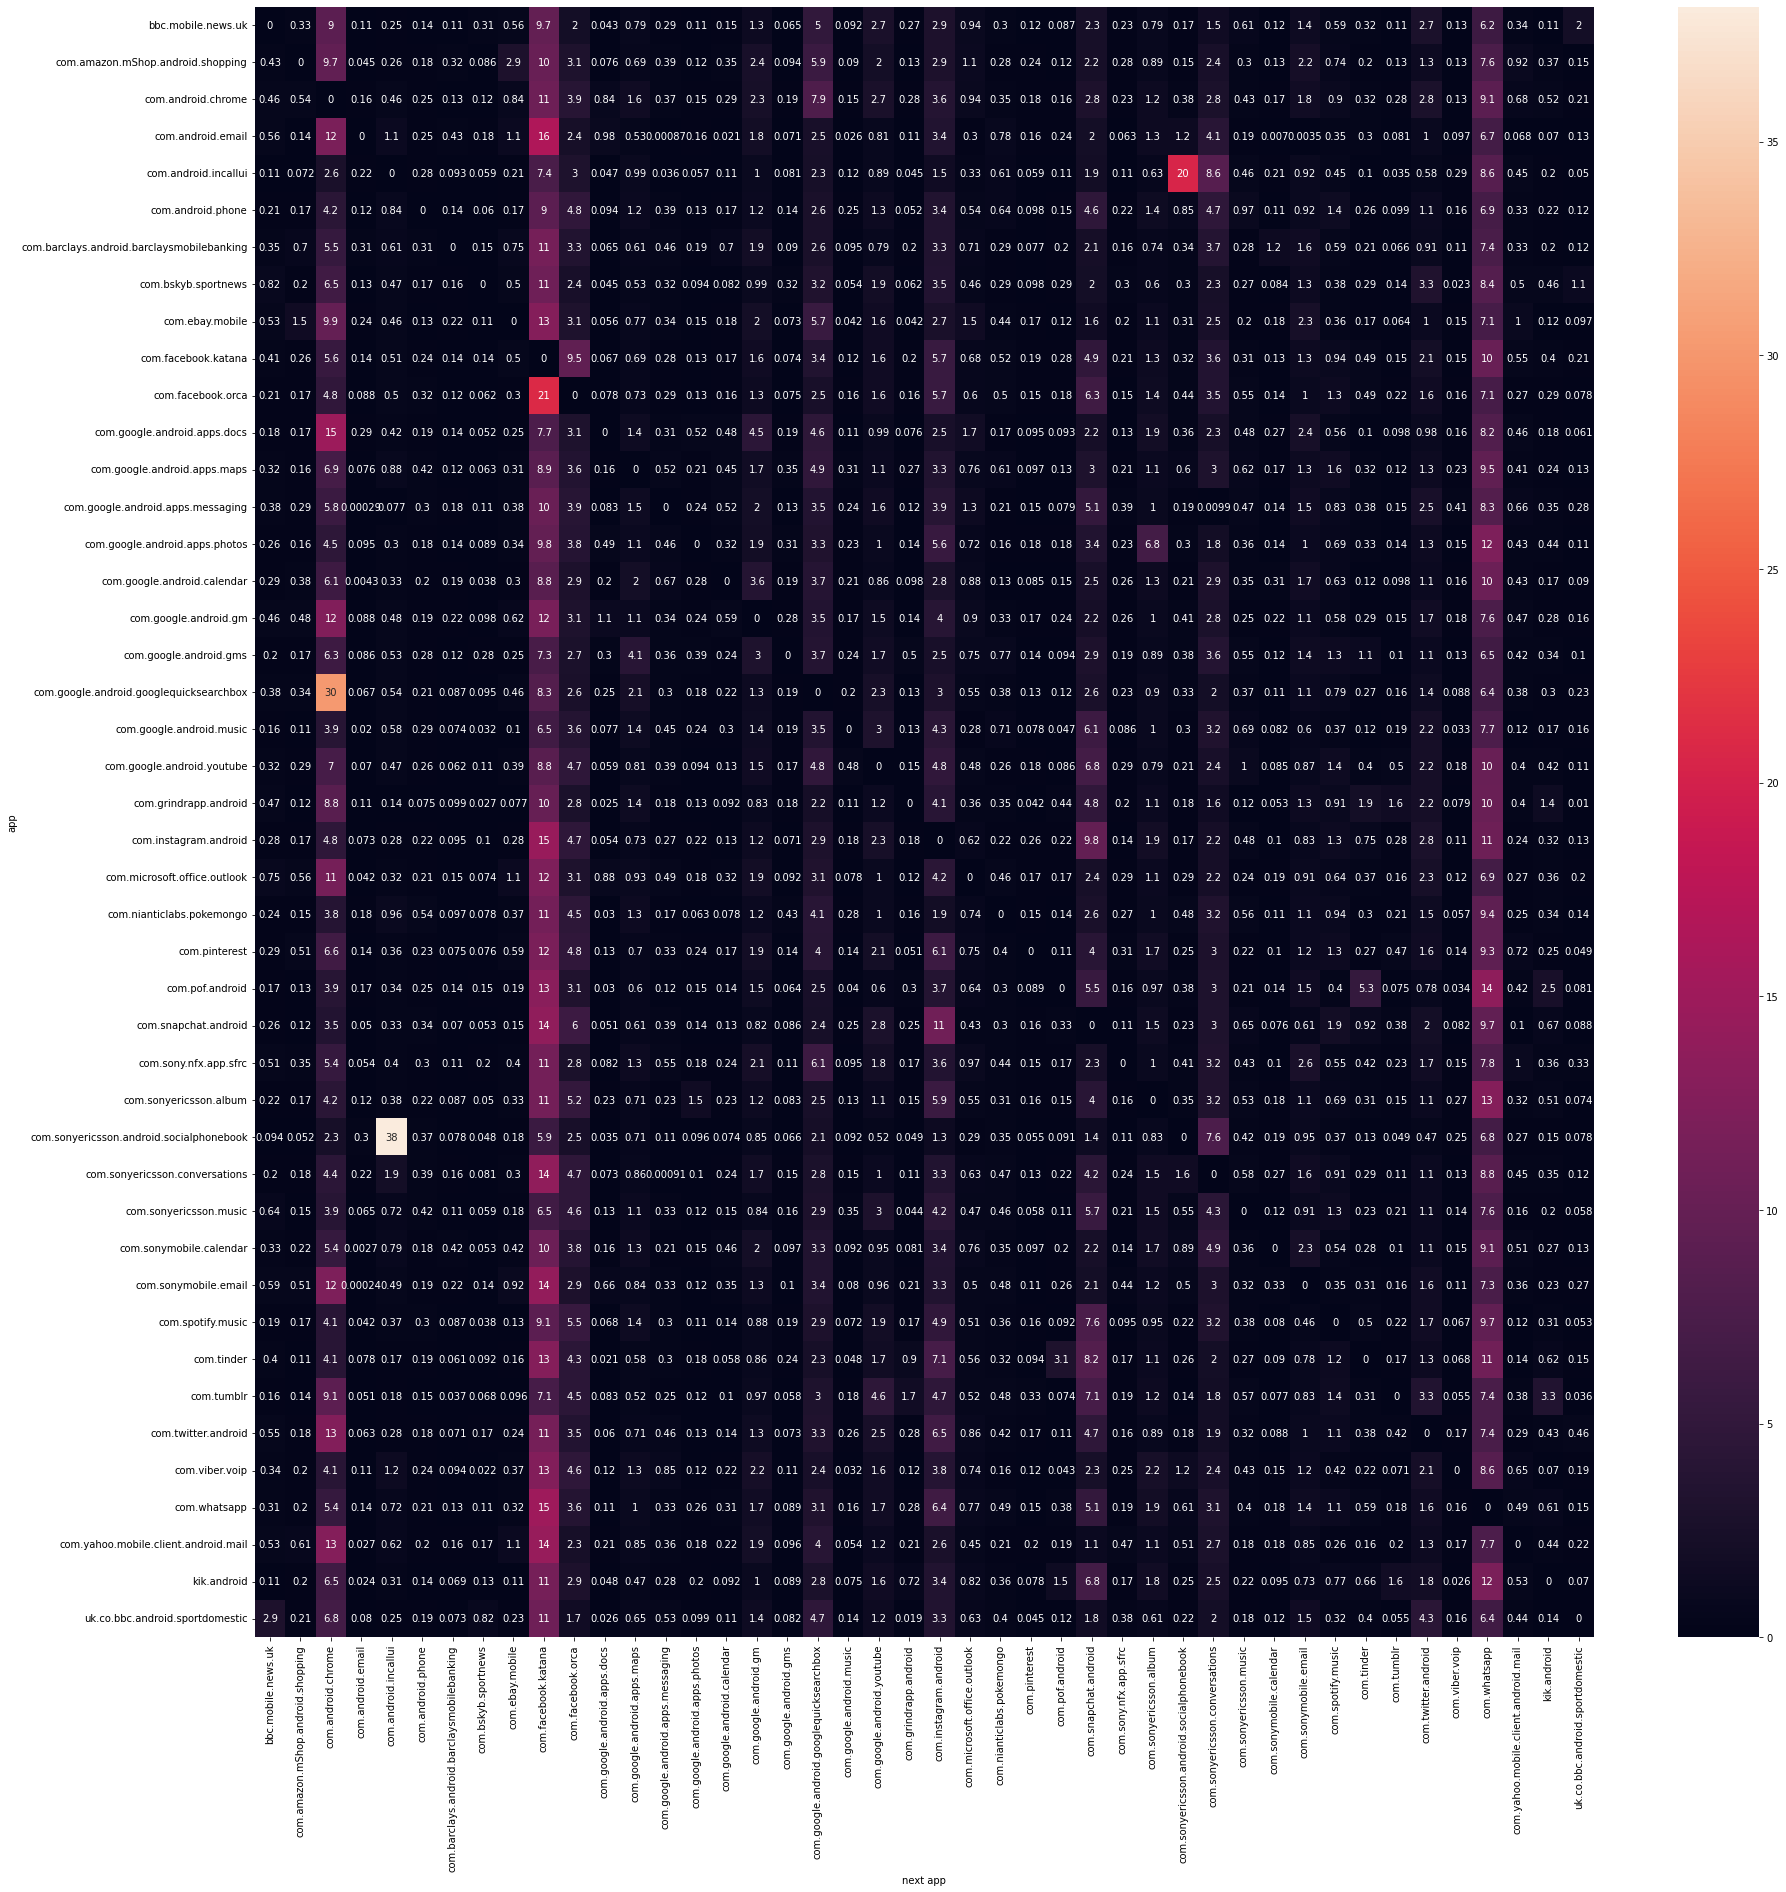

In [23]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(Transaction_matrix, annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

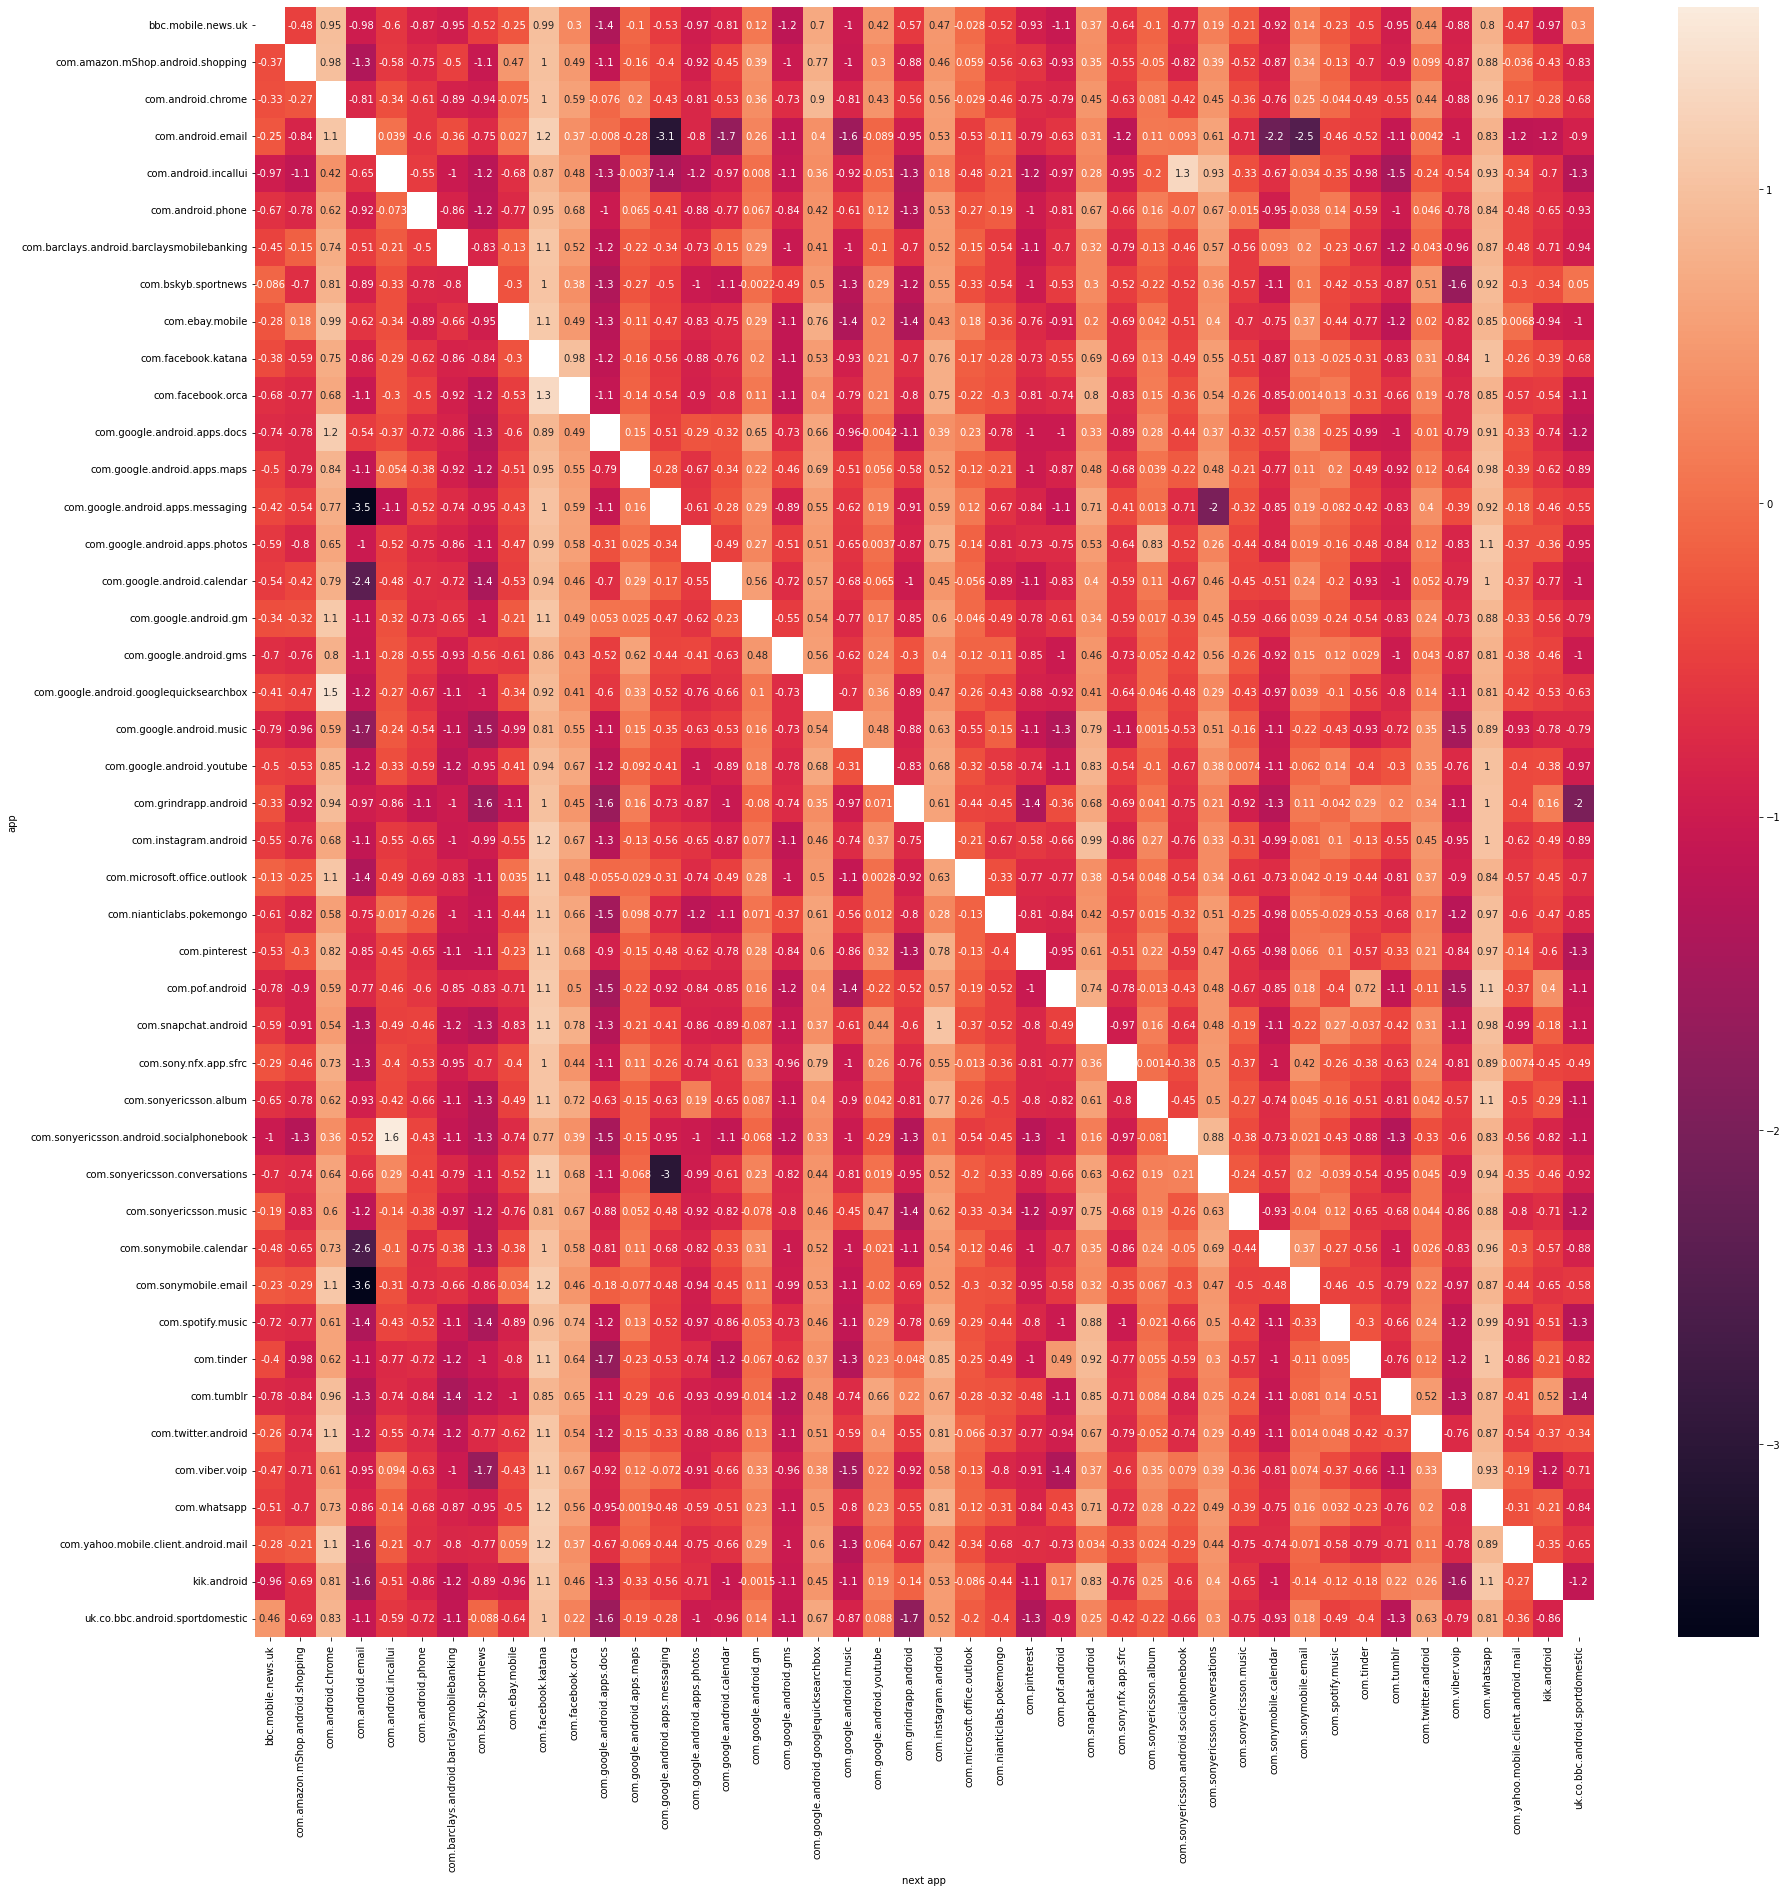

In [24]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix.replace(0, np.NaN)), annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_20.png')
plt.show()

# Find pattern and create Transition Matrix for 20%-40% quantile Using N-gram

In [5]:
data_20_40=pd.read_csv("data_20_40_quantile.csv")

In [6]:
data_20_40=data_20_40.merge(data_20_40.groupby(['user_id','session'])\
                                  .agg({'session':'size'})\
                                     .rename(columns={'session':'session_length'})\
                                       .reset_index(),on=['user_id','session'])

In [7]:
user_corpus_20_40=data_20_40.groupby(['user_id','session']).package_name.apply(' '.join)

## 1-gram

In [8]:
print("Number of sessions:",user_corpus_20_40.shape[0])
print("0.5% of sessions:",user_corpus_20_40.shape[0]/100*0.5)

Number of sessions: 18223271
0.5% of sessions: 91116.355


In [9]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1))
vectorization=vectorizer.fit_transform(user_corpus_20_40.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]

array(['bbc.mobile.news.uk', 'com.amazon.mshop.android.shopping',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.google.android.apps.docs',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.music', 'com.google.android.youtube',
       'com.instagram.android', 'com.microsoft.office.outlook',
       'com.nianticlabs.pokemongo', 'com.pinterest',
       'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.

In [10]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]))

Number of frequent patterns: 37


In [14]:
frequent_apps=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>91116)[1]]

0.5% Number of frequent patterns: 37

## 2-gram

In [62]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_20_40.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.gm',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.google.android.youtube',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.snapchat.android',
       'com.facebook.katana com.sonyericsson.album',
       'com.facebook.k

In [63]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]))

Number of frequent patterns: 59


## 3-gram

In [64]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_20_40.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]

array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.facebook.orca com.facebook.katana com.facebook.orca',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.whatsapp com.facebook.katana com.whatsapp'], dtype=object)

In [65]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]))

Number of frequent patterns: 8


## 4-gram

In [66]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_20_40.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]

array([], dtype=object)

In [67]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=91116)[1]]))

Number of frequent patterns: 0


# Transition matrix

In [11]:
data_20_40=data_20_40.groupby(['user_id','session'])['package_name']\
         .apply(lambda x: pd.Series(['start'] + x.tolist() + ['end']))\
         .reset_index().drop('level_2', 1)

<ipython-input-11-ecba0fd86a32>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_20_40=data_20_40.groupby(['user_id','session'])['package_name']\


In [12]:
data_20_40 = data_20_40.loc[:,['user_id','session','package_name']]

In [15]:
df_frequent_app_count = data_20_40[data_20_40.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [16]:
data_20_40['next_app'] = data_20_40.groupby(['user_id','session']).package_name.shift(-1)

In [17]:
df_next_app_count=data_20_40[data_20_40.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [18]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [19]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [20]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [21]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [22]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [23]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [27]:
Transaction_matrix.to_csv("Transaction_matrix_20_40_quantile_grouped.csv",index='False')

In [28]:
Transaction_matrix=pd.read_csv("Transaction_matrix_20_40_quantile_grouped.csv", index_col=0)

In [29]:
Transaction_matrix=Transaction_matrix.fillna(0)

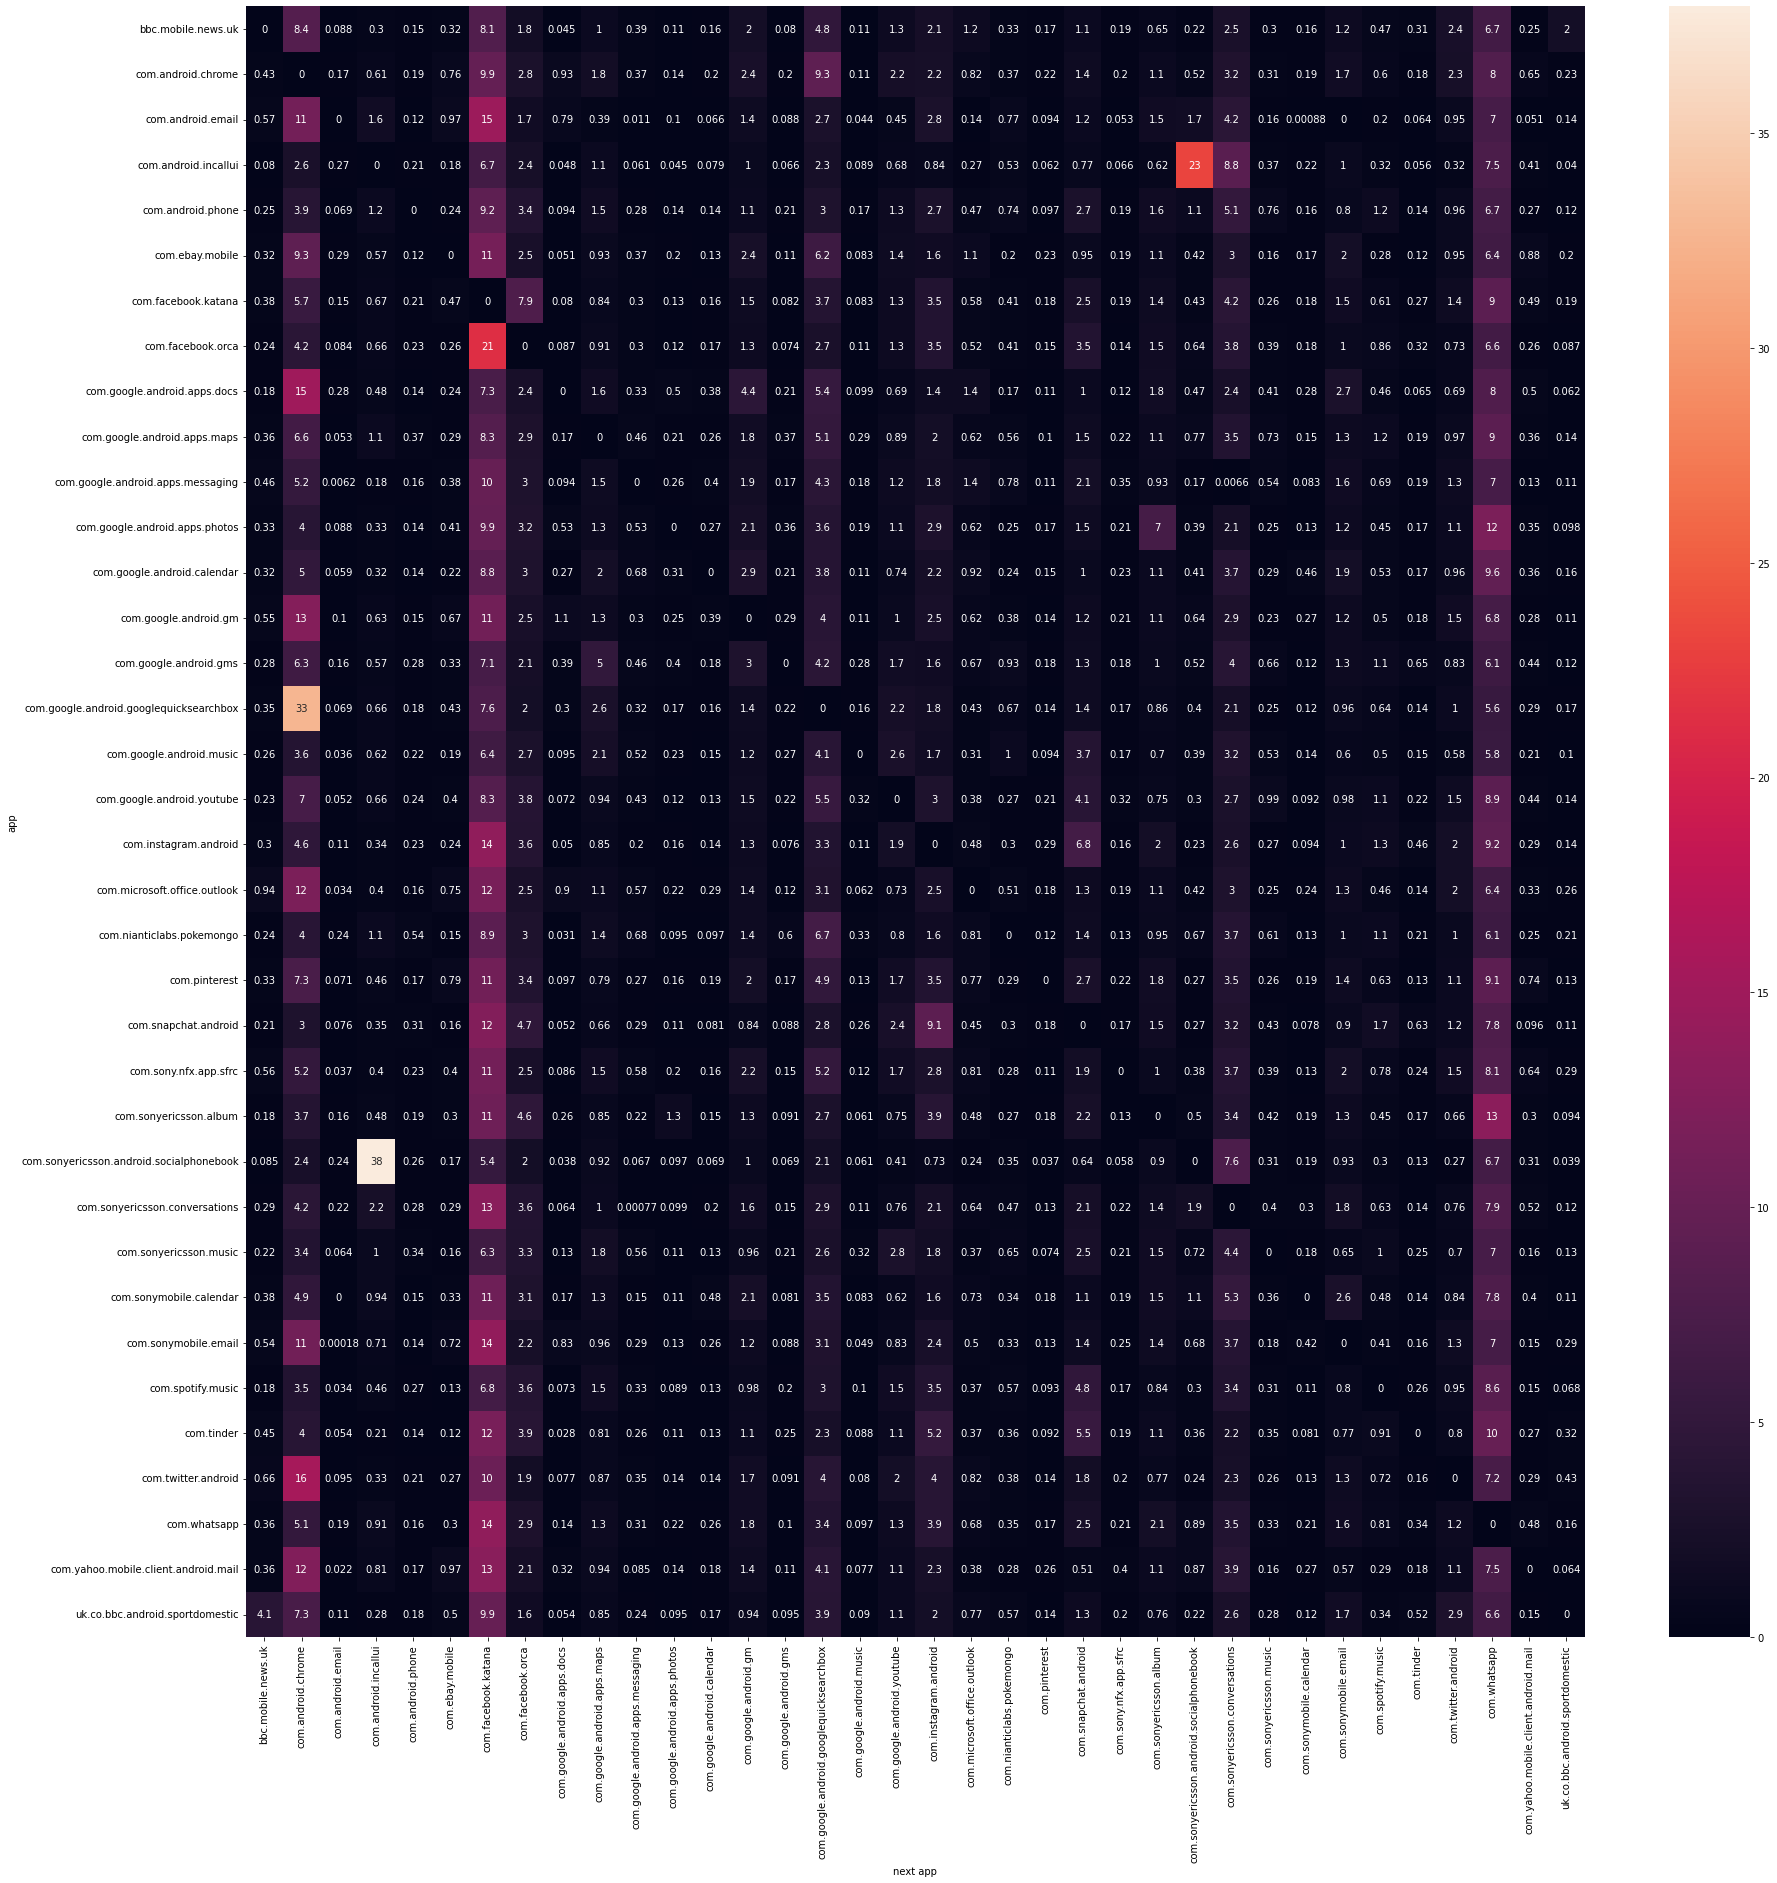

In [26]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(Transaction_matrix, annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()


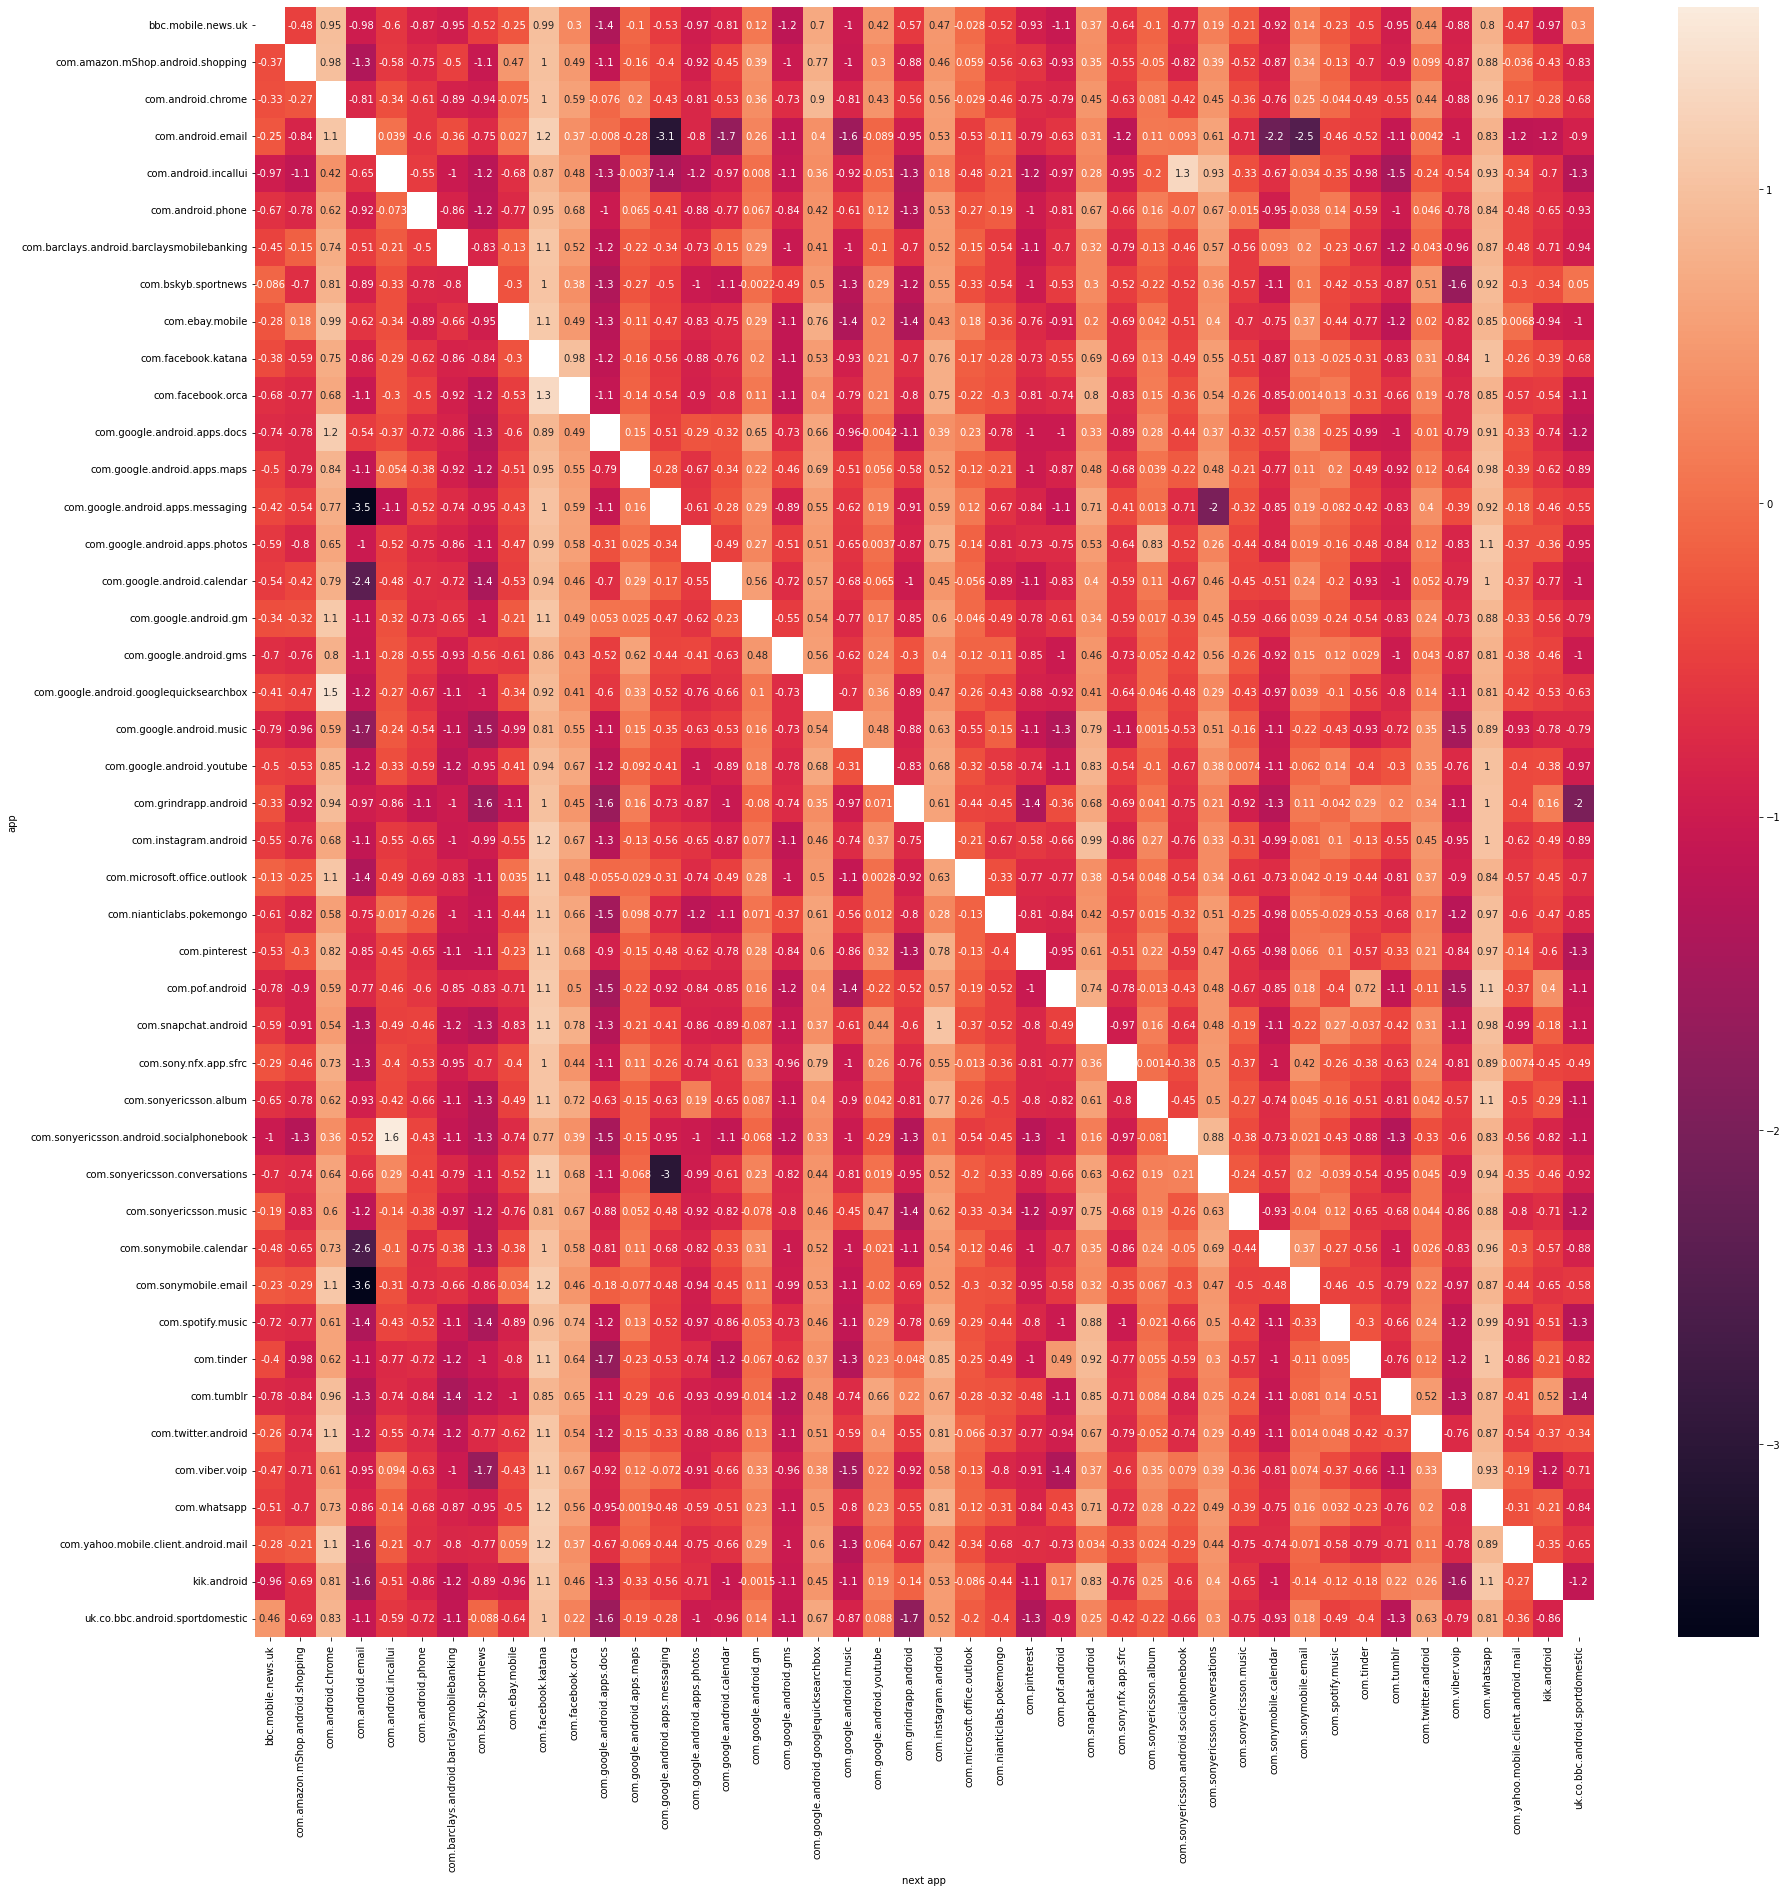

In [30]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix.replace(0, np.NaN)), annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_20_40.png')
plt.show()

# Find pattern and create Transition Matrix for 40%-60% quantile Using N-gram

In [2]:
data_40_60=pd.read_csv("data_40_60_quantile.csv")

In [3]:
data_40_60=data_40_60.merge(data_40_60.groupby(['user_id','session'])\
                                  .agg({'session':'size'})\
                                     .rename(columns={'session':'session_length'})\
                                       .reset_index(),on=['user_id','session'])

In [28]:
user_corpus_40_60=data_40_60.groupby(['user_id','session']).package_name.apply(' '.join)

## 1-gram

In [29]:
print("Number of sessions:",user_corpus_40_60.shape[0])
print("0.5% of sessions:",user_corpus_40_60.shape[0]/100*0.5)

Number of sessions: 16504450
0.5% of sessions: 82522.25


In [30]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1))
vectorization=vectorizer.fit_transform(user_corpus_40_60.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mshop.android.shopping', 'com.android.chrome',
       'com.android.email', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.docs', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.pinterest', 'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.

In [31]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]))

Number of frequent patterns: 37


In [32]:
frequent_apps=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>82522)[1]]

## 2-gram

In [74]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_40_60.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.gm',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.sonyericsson.album',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.sonymobile.email',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana',
       'com.facebook.orca c

In [75]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]))

Number of frequent patterns: 44


## 3-gram

In [77]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_40_60.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]

array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.whatsapp com.facebook.katana com.whatsapp'], dtype=object)

In [79]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]))

Number of frequent patterns: 6


## 4-gram

In [80]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization = vectorizer.fit_transform(user_corpus_40_60.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]

array([], dtype=object)

In [81]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=82522)[1]]))

Number of frequent patterns: 0


## Transition Matrix of 40-60

In [33]:
data_40_60=data_40_60.groupby(['user_id','session'])['package_name']\
         .apply(lambda x: pd.Series(['start'] + x.tolist() + ['end']))\
         .reset_index().drop('level_2', 1)

<ipython-input-33-4fe7dea9a3a3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_40_60=data_40_60.groupby(['user_id','session'])['package_name']\


In [34]:
data_40_60 = data_40_60.loc[:,['user_id','session','package_name']]

In [35]:
df_frequent_app_count = data_40_60[data_40_60.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [36]:
data_40_60['next_app'] = data_40_60.groupby(['user_id','session']).package_name.shift(-1)

In [37]:
df_next_app_count=data_40_60[data_40_60.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [38]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [39]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [40]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [41]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [42]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [43]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [44]:
Transaction_matrix=Transaction_matrix.fillna(0)

In [45]:
Transaction_matrix.to_csv("Transaction_matrix_40_60_quantile_grouped.csv",index='False')

In [31]:
Transaction_matrix=pd.read_csv("Transaction_matrix_40_60_quantile_grouped.csv", index_col=0)

In [32]:
Transaction_matrix=Transaction_matrix.fillna(0)

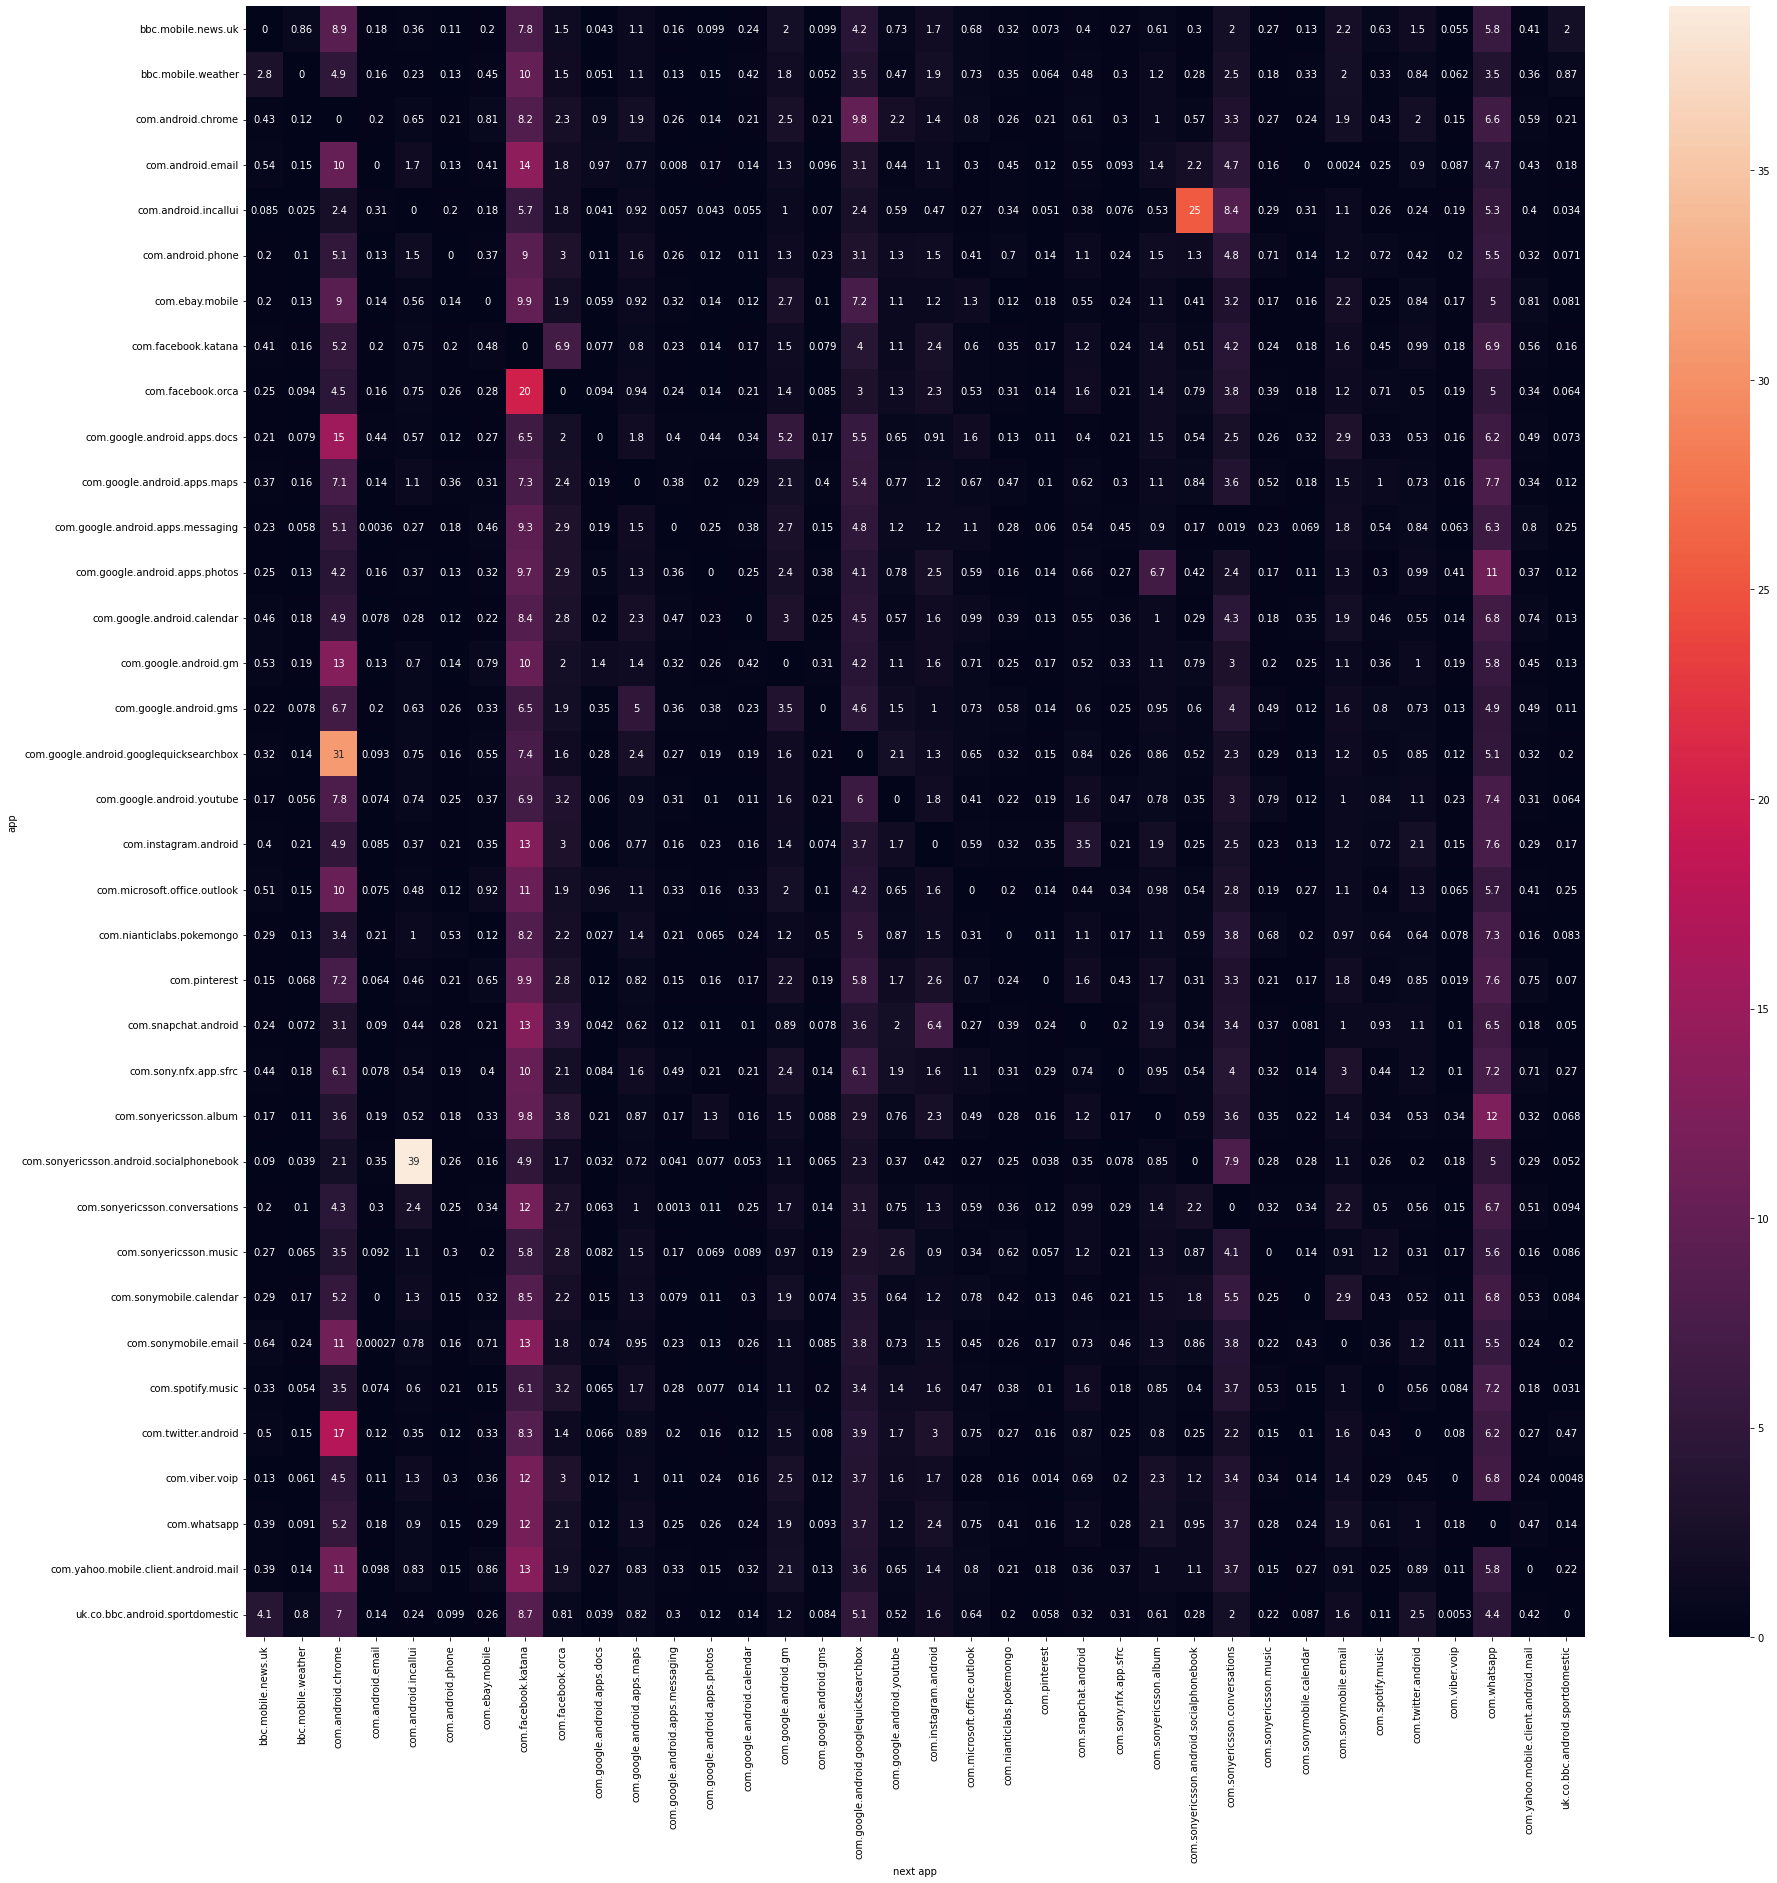

In [46]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(Transaction_matrix, annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_40_60.png')
plt.show()

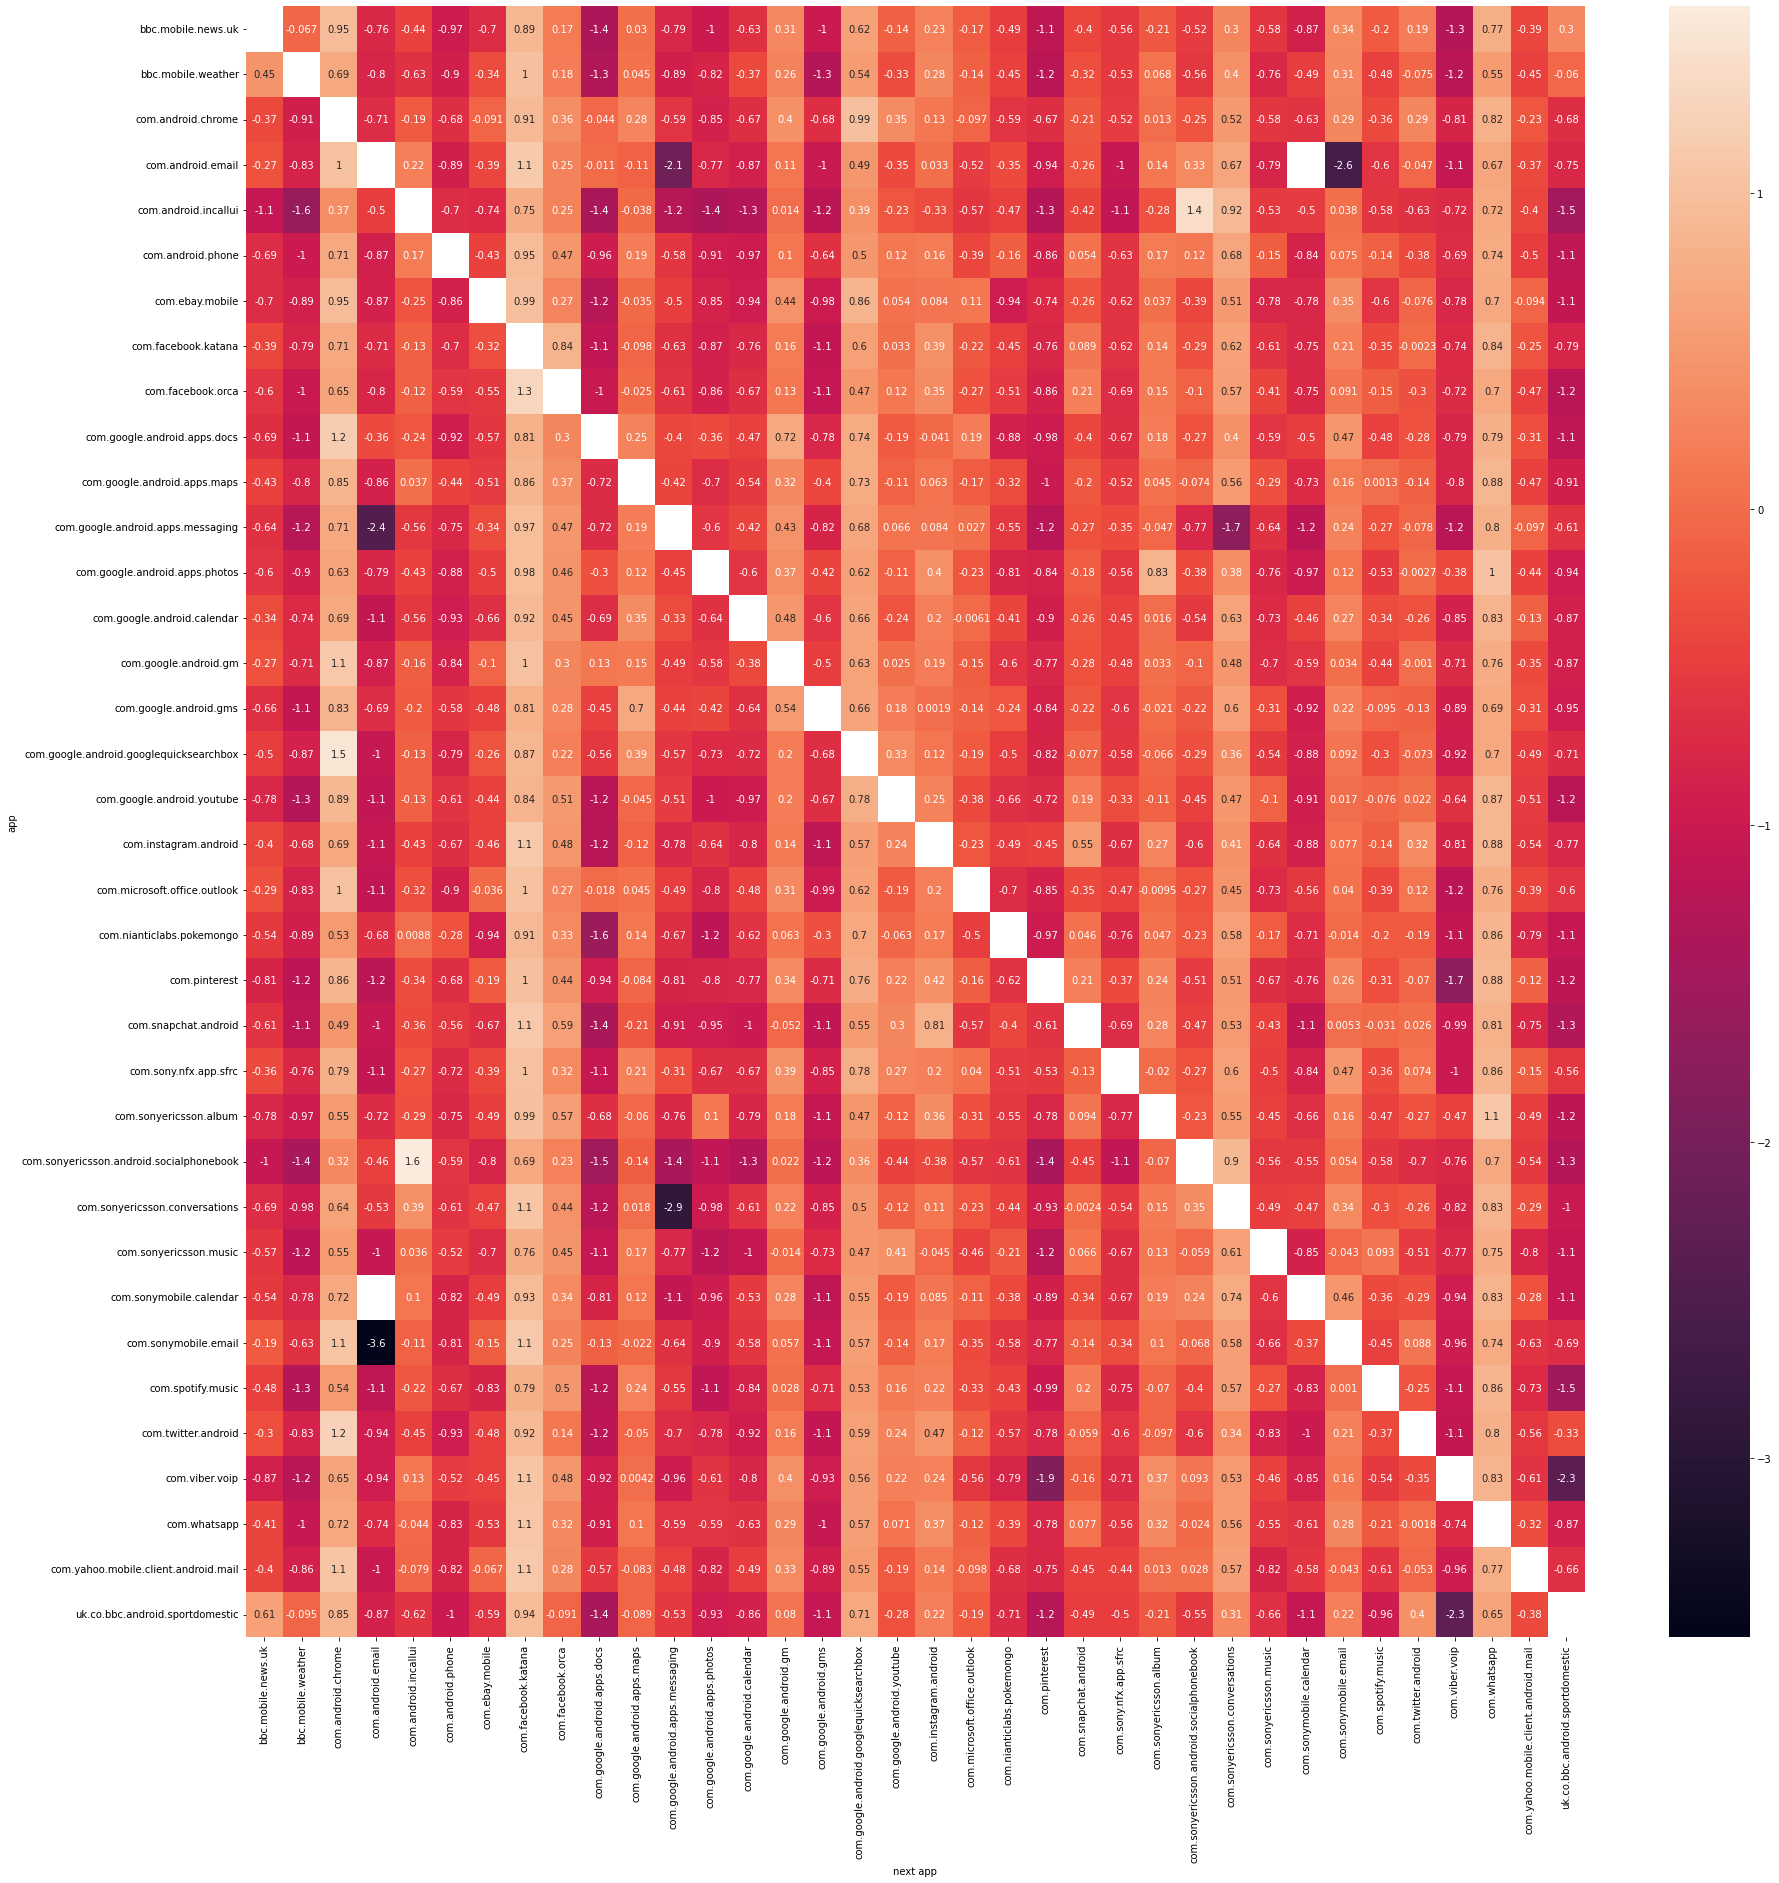

In [33]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix.replace(0, np.NaN)), annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_40_60.png')
plt.show()

# Find pattern and create Transition Matrix for 60%-80% quantile Using N-gram

In [2]:
data_60_80=pd.read_csv("data_60_80_quantile.csv")

In [3]:
data_60_80=data_60_80.merge(data_60_80.groupby(['user_id','session'])\
                                  .agg({'session':'size'})\
                                     .rename(columns={'session':'session_length'})\
                                       .reset_index(),on=['user_id','session'])

In [4]:
user_corpus_60_80=data_60_80.groupby(['user_id','session']).package_name.apply(' '.join)

## 1-gram

In [5]:
print("Number of sessions:",user_corpus_60_80.shape[0])
print("0.5% of sessions:",user_corpus_60_80.shape[0]/100*0.5)

Number of sessions: 14402543
0.5% of sessions: 72012.715


In [6]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1))
vectorization=vectorizer.fit_transform(user_corpus_60_80.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mshop.android.shopping', 'com.android.chrome',
       'com.android.email', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.docs', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.pinterest', 'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.

In [7]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]))

Number of frequent patterns: 36


In [8]:
frequent_apps=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>72012)[1]]

In [9]:
frequent_apps

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mshop.android.shopping', 'com.android.chrome',
       'com.android.email', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.docs', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.pinterest', 'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.

## 2-gram

In [8]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_60_80.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.sonymobile.email',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana',
       'com.google.android.gm com.android.chrome',
       'com.google.android.gm com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.facebook.katana',
       'com.google.android.googlequicksearchb

In [9]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]))

Number of frequent patterns: 32


## 3-gram

In [10]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_60_80.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]

array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox'],
      dtype=object)

In [11]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]))

Number of frequent patterns: 3


## 4-gram

In [12]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_60_80.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]

array([], dtype=object)

In [13]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=72012)[1]]))

Number of frequent patterns: 0


# Transition matrix

In [10]:
data_60_80=data_60_80.groupby(['user_id','session'])['package_name']\
         .apply(lambda x: pd.Series(['start'] + x.tolist() + ['end']))\
         .reset_index().drop('level_2', 1)

<ipython-input-10-2f86674a9e0e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_60_80=data_60_80.groupby(['user_id','session'])['package_name']\


In [11]:
data_60_80 = data_60_80.loc[:,['user_id','session','package_name']]

In [12]:
df_frequent_app_count = data_60_80[data_60_80.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [13]:
data_60_80['next_app'] = data_60_80.groupby(['user_id','session']).package_name.shift(-1)

In [14]:
df_next_app_count=data_60_80[data_60_80.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [15]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [16]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [17]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [18]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [19]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [20]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [21]:
Transaction_matrix=Transaction_matrix.fillna(0)

In [22]:
Transaction_matrix.to_csv("Transaction_matrix_60_80_quantile_grouped.csv",index='False')

In [34]:
Transaction_matrix=pd.read_csv("Transaction_matrix_60_80_quantile_grouped.csv", index_col=0)

In [35]:
Transaction_matrix=Transaction_matrix.fillna(0)

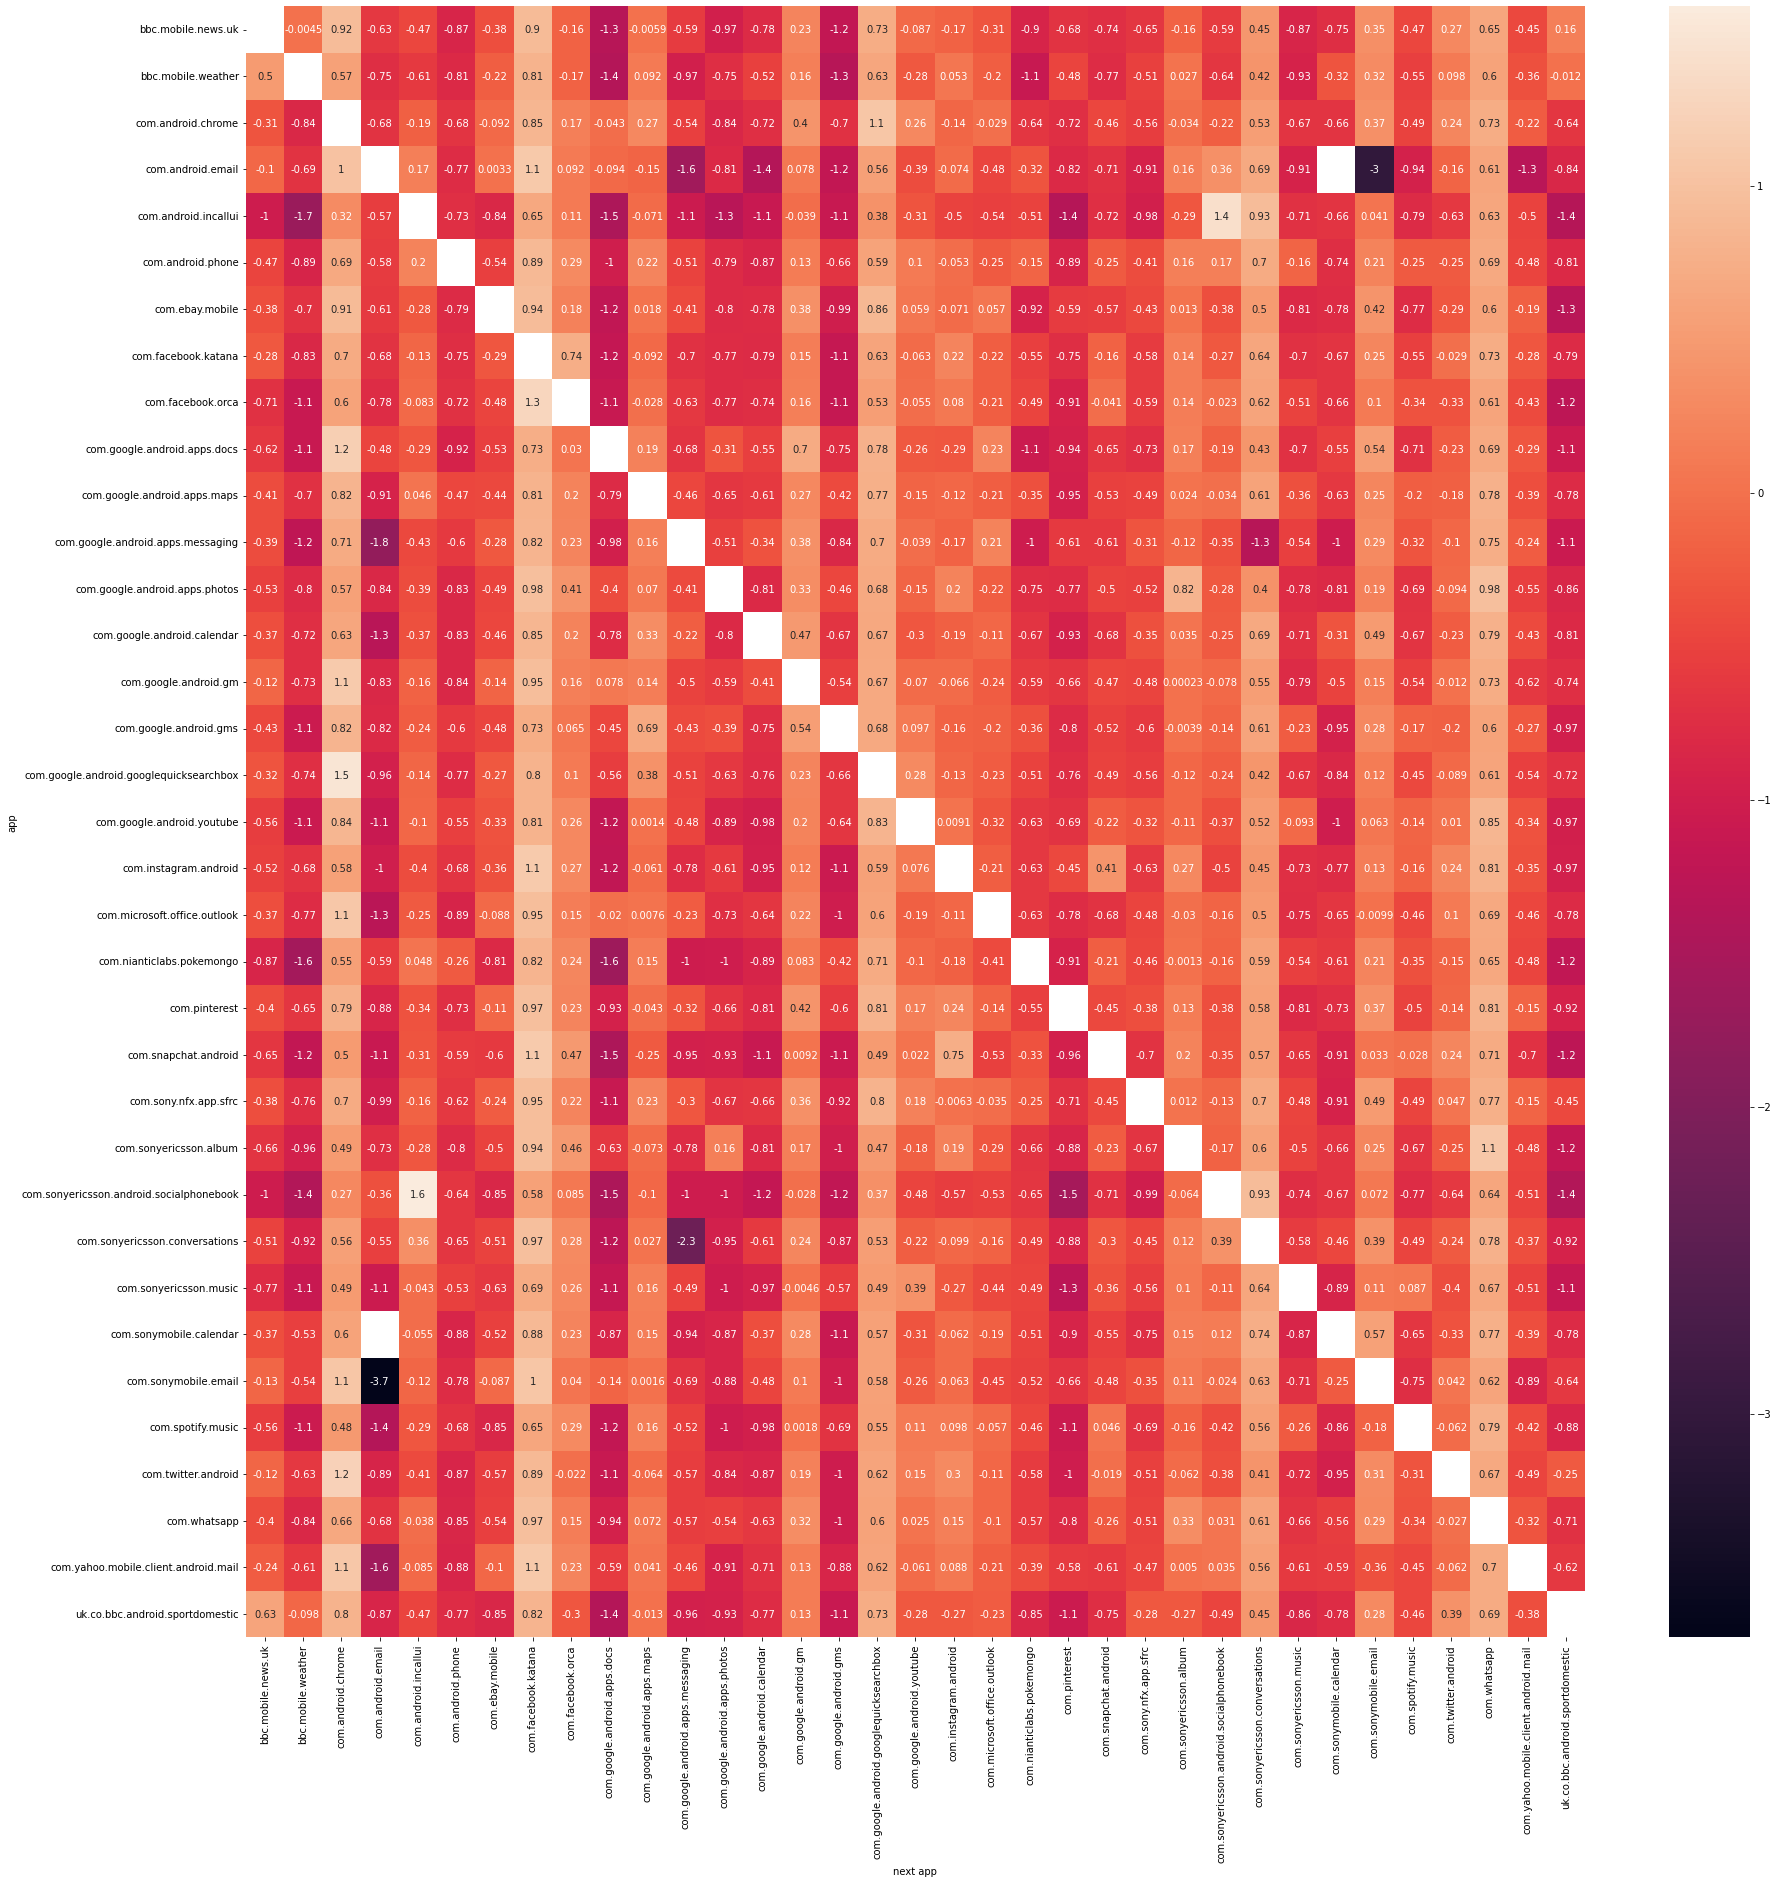

In [36]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix.replace(0, np.NaN)), annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_60_80.png')
plt.show()

# Find pattern and create Transition Matrix for 80%-100% quantile Using N-gram

In [24]:
data_80_100=pd.read_csv("data_80_100_quantile.csv")

In [25]:
data_80_100=data_80_100.merge(data_80_100.groupby(['user_id','session'])\
                                  .agg({'session':'size'})\
                                     .rename(columns={'session':'session_length'})\
                                       .reset_index(),on=['user_id','session'])

In [26]:
user_corpus_80_100=data_80_100.groupby(['user_id','session']).package_name.apply(' '.join)

## 1-gram

In [27]:
print("Number of sessions:",user_corpus_80_100.shape[0])
print("0.5% of sessions:",user_corpus_80_100.shape[0]/100*0.5)

Number of sessions: 9177167
0.5% of sessions: 45885.835


In [28]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1))
vectorization=vectorizer.fit_transform(user_corpus_80_100.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mshop.android.shopping', 'com.android.chrome',
       'com.android.email', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.fitbitmobile', 'com.google.android.apps.docs',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.sony.nfx.app.sfrc', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.sonymobile.entrance', 'com.spotify.

In [29]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]))

Number of frequent patterns: 36


In [32]:
frequent_apps=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>45885)[1]]

In [33]:
frequent_apps

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mshop.android.shopping', 'com.android.chrome',
       'com.android.email', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.fitbitmobile', 'com.google.android.apps.docs',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.sony.nfx.app.sfrc', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.sonymobile.entrance', 'com.spotify.

 ## 2-gram

In [20]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_80_100.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana',
       'com.google.android.gm com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.facebook.katana',
       'com.sonyericsson.android.socialphonebook com.android.incallui',
       'com.sonyericsson.android.socialphonebook com.sonyericsson.conversations',
       'com.sonyericsson.

In [21]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]))

Number of frequent patterns: 29


## 3-gram

In [22]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_80_100.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]

array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.sonyericsson.android.socialphonebook com.android.incallui com.sonyericsson.android.socialphonebook'],
      dtype=object)

In [23]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]))

Number of frequent patterns: 3


## 4-gram

In [24]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_80_100.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]

array([], dtype=object)

In [25]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=45885)[1]]))

Number of frequent patterns: 0


## Transition Matrix

In [34]:
data_80_100=data_80_100.groupby(['user_id','session'])['package_name']\
         .apply(lambda x: pd.Series(['start'] + x.tolist() + ['end']))\
         .reset_index().drop('level_2', 1)

<ipython-input-34-5bdb7898d3ec>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_80_100=data_80_100.groupby(['user_id','session'])['package_name']\


In [35]:
data_80_100 = data_80_100.loc[:,['user_id','session','package_name']]

In [36]:
df_frequent_app_count = data_80_100[data_80_100.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [37]:
data_80_100['next_app'] = data_80_100.groupby(['user_id','session']).package_name.shift(-1)

In [38]:
df_next_app_count=data_80_100[data_80_100.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [39]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [40]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [41]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [42]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [43]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [44]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [45]:
Transaction_matrix=Transaction_matrix.fillna(0)

In [46]:
Transaction_matrix.to_csv("Transaction_matrix_80_100_quantile_grouped.csv",index='False')

In [37]:
Transaction_matrix=pd.read_csv("Transaction_matrix_80_100_quantile_grouped.csv", index_col=0)

In [38]:
Transaction_matrix=Transaction_matrix.fillna(0)

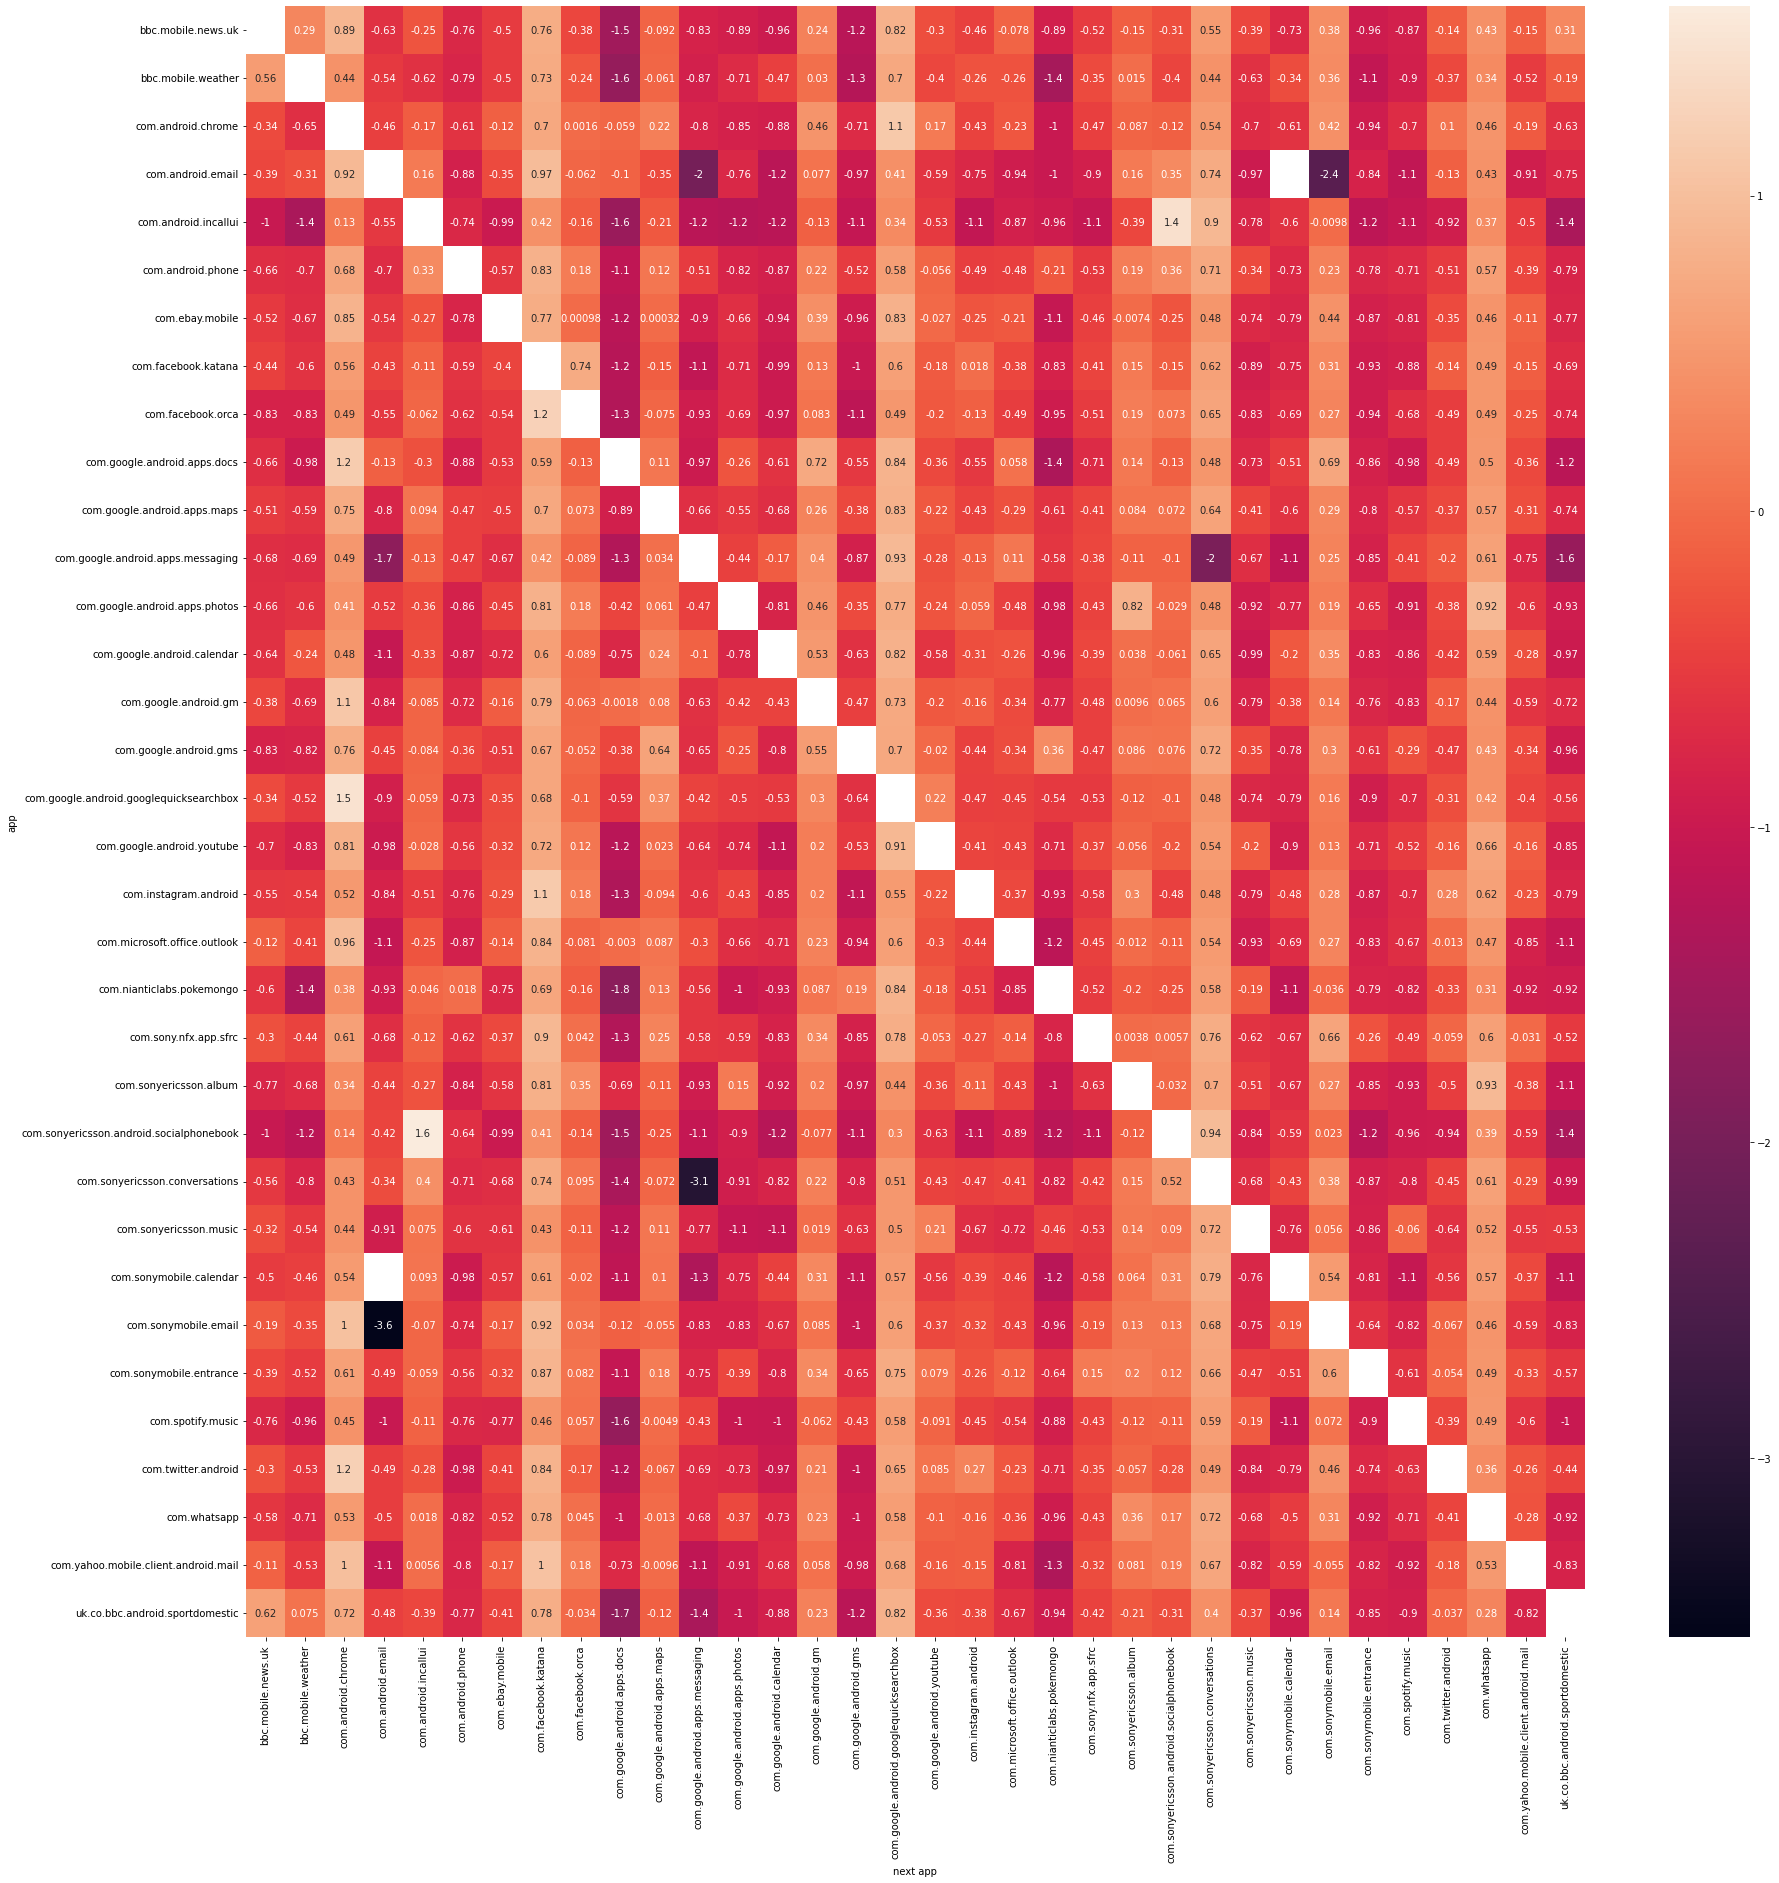

In [39]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix.replace(0, np.NaN)), annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.savefig('output_80_100.png')
plt.show()

## The rest is GC

In [48]:
input_string=data_0_20[data_0_20.session_length_x>1]\
                .groupby(['user_id','session'])['app_code']\
                    .apply(list).apply(lambda l: ' -1 '.join([str(i) for i in l])+" -1 -2")
#[data_0_25.session_length>1]

KeyboardInterrupt: 

In [ ]:
#input_string.to_csv("input_string_data_25_quantile_without_length_1.csv",index='False')
input_string.to_csv("input_string_data_0_20_quantile_without_length_1.csv",index='False')

In [3]:
#input_string=pd.read_csv("input_string_data_20_quantile_without_length_1.csv")
input_string=pd.read_csv("input_string_data_0_20_quantile_without_length_1.csv")

In [4]:
input_string=input_string.drop(['user_id','session'],axis=1)

In [5]:
input_string

app_code
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  23949 -1 7649 -1 23949 -1 36189 -1 27441 -1 19968 -1 -2
1                                                                                                                                                                                                                                                                                                                                                                                                                                                               19968 -1 19973 -1 27441 -1 46262 -1 45329 -1 45260 -1 19968 -1 19973 -1 -2
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          19968 -1 19973 -1 19968 -1 27441 -1 27056 -1 -2
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 19968 -1 18676 -1 19973 -1 45329 -1 18676 -1 27441 -1 -2
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 19968 -1 19973 -1 27441 -1 19968 -1 27441 -1 19968 -1 -2
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ...
12181163  19968 -1 23949 -1 27441 -1 19968 -1 19973 -1 19968 -1 45264 -1 19973 -1 45264 -1 19968 -1 45264 -1 23949 -1 7649 -1 23949 -1 45264 -1 23949 -1 7649 -1 23949 -1 19973 -1 7649 -1 19973 -1 19968 -1 7649 -1 23949 -1 19973 -1 27441 -1 19968 -1 23949 -1 7649 -1 23949 -1 7649 -1 23949 -1 19973 -1 19968 -1 7649 -1 19973 -1 23949 -1 45264 -1 23949 -1 7649 -1 23949 -1 27441 -1 23949 -1 7649 -1 23949 -1 19968 -1 23926 -1 23215 -1 23949 -1 7649 -1 23949 -1 23215 -1 7649 -1 23949 -1 7649 -1 23967 -1 45264 -1 19968 -1 -2
12181164                                                                                                                                                                                                                                                                                                                                  

In [62]:
#input_string[:7550339]

In [63]:

#input_string.iloc[-7550339:]

In [39]:
#dfAsString_1 = input_string[:7550339].to_string(header=False, index=False).lstrip()

In [40]:
#len(dfAsString_1)

35992461283

In [45]:
#len(dfAsString_2)

23005879905

In [41]:
#dfAsString_2=input_string.iloc[-7550339:].to_string(header=False, index=False).lstrip()

In [6]:
#dfAsString = dfAsString_1+dfAsString_2
dfAsString =input_string.to_string(header=False, index=False).lstrip()

In [46]:
#len(dfAsString)

778594338

In [7]:
dfAsString=re.sub(r'\n\s+','\n',dfAsString)

In [8]:
#update file name
f = open(os.path.join(os.getcwd(), 'data_0_20_quantile_without_length_1.txt'), 'w')
f.write(dfAsString)
f.close()

In [9]:
spmf = Spmf("VMSP", input_filename="/home/s165317/motifs_and_competition_in_app_usage/data_0_20_quantile_without_length_1.txt",
            output_filename="/home/s165317/motifs_and_competition_in_app_usage/output_VMSP_data_0_20_quantile_without_length_1_min_sup_0_75.txt",
            spmf_bin_location_dir="/home/s165317/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_data_0_20_quantile_without_length_1.txt_min_sup_0_75.csv")

CalledProcessError: Command '['java', '-jar', '/home/s165317/motifs_and_competition_in_app_usage/spmf.jar', 'run', 'VMSP', '/home/s165317/motifs_and_competition_in_app_usage/data_0_20_quantile_without_length_1.txt', '/home/s165317/motifs_and_competition_in_app_usage/output_VMSP_data_0_20_quantile_without_length_1_min_sup_0_75.txt', '0.0075']' returned non-zero exit status 1.

## Find pattern and create Transition Matrix for 25% - 50% 